In [2]:
# PLOT & MANIPULATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# METRICS
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import (ConfusionMatrixDisplay,
                             confusion_matrix,
                             classification_report,
                             make_scorer,
                             f1_score)


# PREPROCESSING AND PIPELINE BUILDING
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
import category_encoders as ce

# MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import RandomizedSearchCV

# MODEL'S
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

# STATISTICS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.integrate import trapezoid

import joblib

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

> # EXPLORATIVE DATA ANALYSIS
<span style="font-size:42px; background-color: #990000; color: white; padding: 4px;">NUMERICAL VARIABLES</span>


# Analysis Report for Numerical Variables

## Age
- Descriptive statistics to understand the age distribution.
## Regional Code
- Explore unique codes and their frequency in the dataset.

## Previously Insured
- Examine the distribution of insured and uninsured individuals.
- Calculate summary statistics for this binary variable.

## Annual Premium
- Descriptive statistics to understand the premium distribution.
- Visualization of distribution

## Policy Sales Channel
- Explore unique sales channels and their distribution.
- Analyze the effectiveness of different sales channels.

## Vintage
- Examine the distribution of customer vintage (duration with the company).
- Calculate summary statistics and visualize the vintage data.

<span style="color: blue;">*This report outlines the initial steps we will take to analyze and get a general idea of how to proceed in preprocessing the numerical variables in the dataset.
Further analysis and modeling will depend on the insights gained from these initial steps.*</span>


In [4]:
numerical = train.select_dtypes(include=[np.number])

<span style="font-size: 32px; background-color: #990000; color: white; padding: 4px;">Variable Analysis --> Age</span>

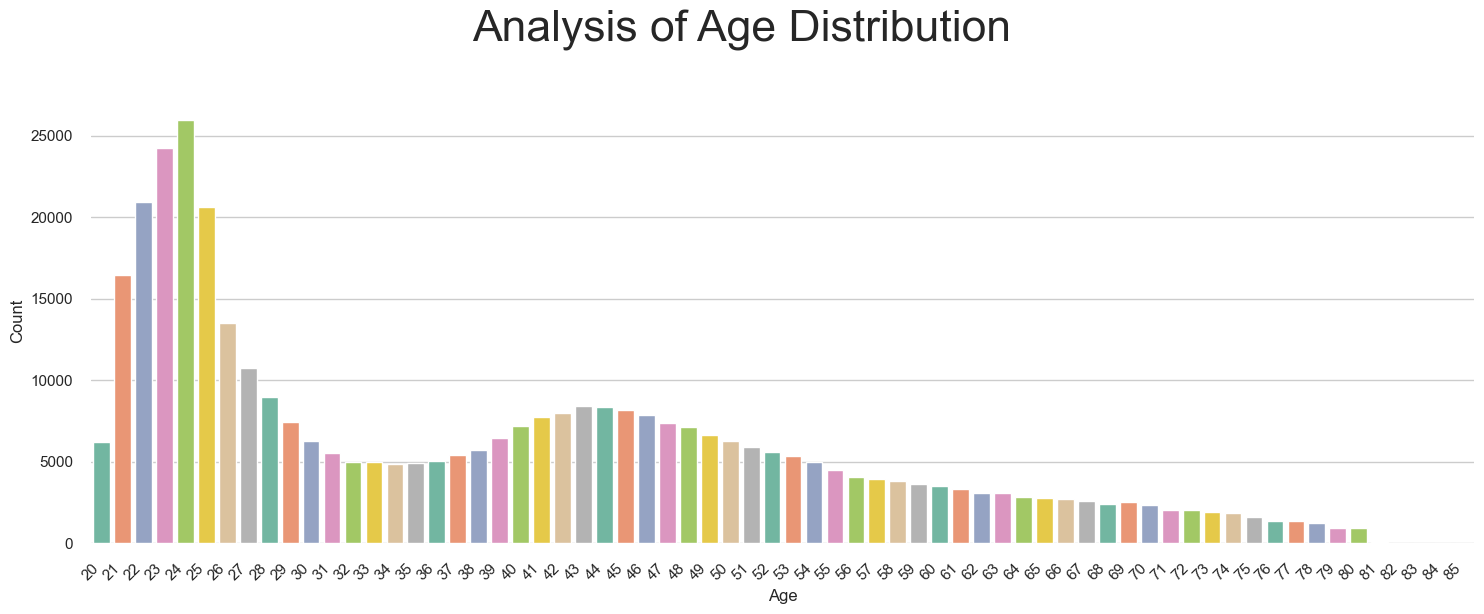

In [5]:
plt.figure(figsize = (15,6))
sns.set(style="whitegrid")   # Set the style to whitegrid
# Create the countplot
ax = sns.countplot(data=numerical, x='Age', palette='Set2')  # Set a custom color palette
# Customize the plot further
plt.suptitle('Analysis of Age Distribution', fontsize=32, y=1.02) 
plt.xlabel('Age')
plt.ylabel('Count')
# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# Add some additional styling
sns.despine(left=True, bottom=True)
# Show the plot
plt.tight_layout()
plt.show()

# Age Distribution Analysis

The analysis of the Age distribution in our dataset reveals an interesting pattern:

- **Bimodal Distribution:** The Age distribution exhibits a bimodal pattern, indicating that there are two distinct peaks in the distribution.

- **Majority in 20-30 Age Group:** The first prominent peak suggests that the majority of our customers fall within the 20 to 30 years age group. This indicates a significant presence of younger customers in our dataset.

- **Concentration Among Middle-Aged Customers:** In addition to the younger age group, there is another noticeable concentration of customers among the middle-aged population. This suggests that we have a significant customer base in their middle years.

The bimodal nature of the Age distribution highlights the diversity of our customer demographics, with substantial representation from both younger and middle-aged individuals.


~~~

<span style="font-size: 32px; background-color: #990000; color: white; padding: 4px;">Variable Analysis --> Region Code</span>

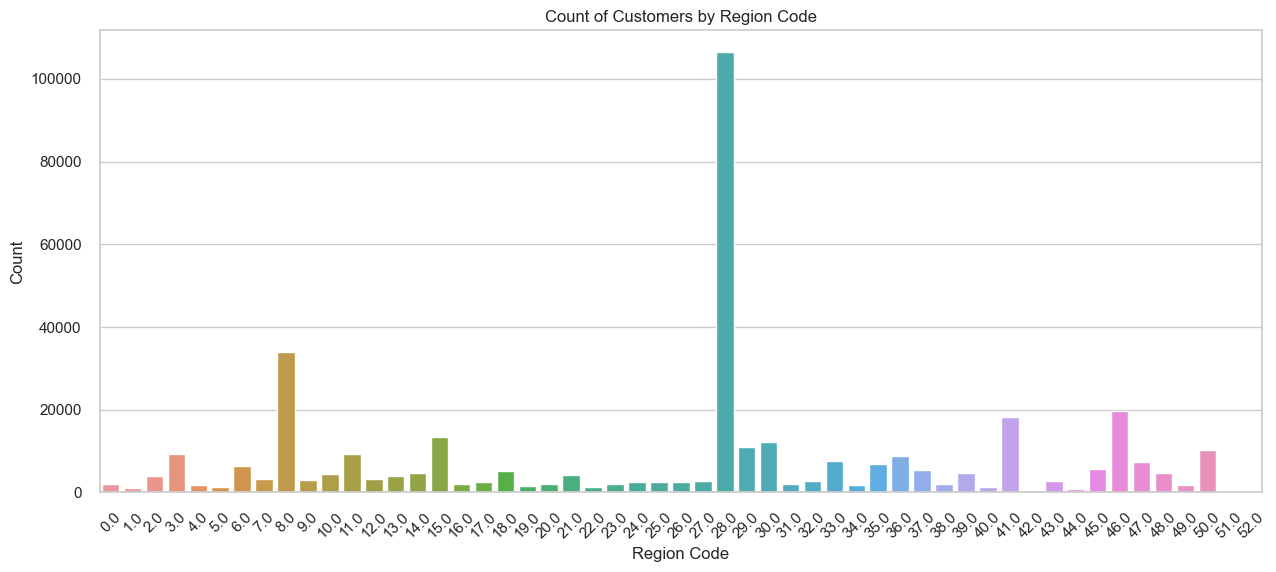

In [6]:
region_counts = numerical['Region_Code'].value_counts().reset_index()
region_counts.columns = ['Region_Code', 'Count']

# Create a countplot
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.barplot(data=region_counts, x='Region_Code', y='Count')
plt.title('Count of Customers by Region Code')
plt.xticks(rotation=45)
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.show()

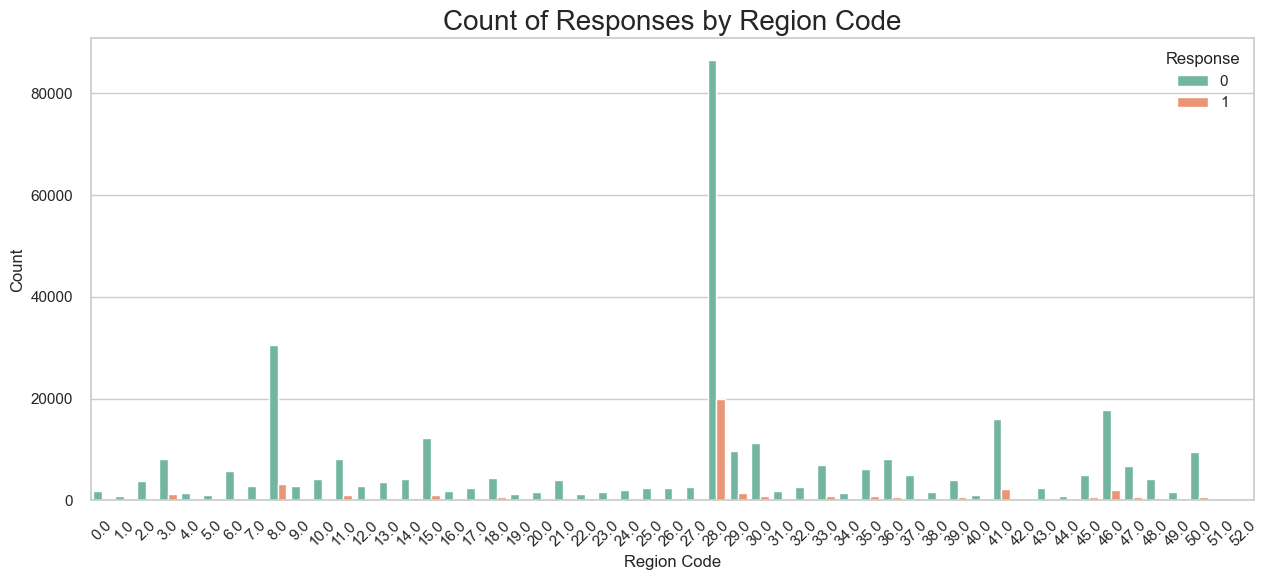

In [7]:
# Create a countplot to visualize the count of 0s and 1s for each region code
plt.figure(figsize=(15, 6))
sns.countplot(data=numerical, x='Region_Code', hue='Response', palette='Set2')
plt.title('Count of Responses by Region Code',size = 20)
plt.xticks(rotation=45)
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.legend(title='Response', labels=['0', '1'])
plt.show()

# Regional Analysis

## Most Frequent Regional Codes

Our analysis of regional data reveals that the following regional codes are the most frequent among our customers:

- Regional Code 8
- Regional Code 28
- Regional Code 41
- Regional Code 46

These regions have the highest representation in our dataset, indicating a substantial customer base from these areas.

## Insurance Uptake by Region

Upon initial examination, it appears that customers (segmented by region) are not particularly inclined to take out insurance for their vehicles with the same company. Further analysis is required to understand the underlying factors influencing this behavior. However, this observation suggests the need for region-specific strategies to increase insurance uptake among our customers.

Understanding the regional dynamics and customer preferences is crucial for tailoring our insurance offerings and marketing efforts to better serve the unique needs and preferences of customers in each region.


~~~

<span style="font-size: 32px; background-color: #990000; color: white; padding: 4px;">Variable Analysis --> Driving License</span>

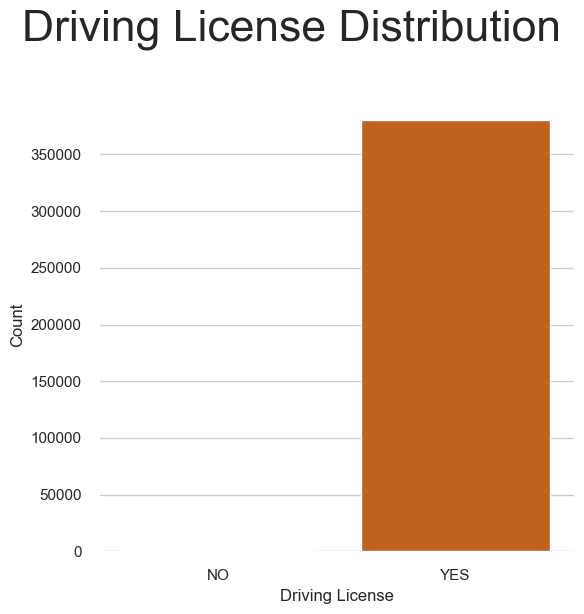

In [8]:
plt.figure(figsize = (6,6))
sns.set(style="whitegrid")   # Set the style to whitegrid
# Create the countplot
ax = sns.countplot(data=numerical, x='Driving_License', palette='Dark2')  # Set a custom color palette
# Customize the plot further
plt.suptitle('Driving License Distribution', fontsize=32, y=1.02) 
# Set the custom tick labels
plt.gca().set_xticklabels(['NO','YES'])
plt.ylabel('Count')
plt.xlabel('Driving License')
# Add some additional styling
sns.despine(left=True, bottom=True)
# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# But how many clients does not have a Driving license?
numerical['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [10]:
print(f"Total number of customers without driving license respect to customer with driving license is: {round(812/380297,5)}%")

Total number of customers without driving license respect to customer with driving license is: 0.00214%


# Driving License Analysis

Our analysis of customer data has revealed a significant insight regarding driving licenses:

- **Overwhelming Majority:** A striking observation is that an overwhelming majority of our customers possess a valid driving license. This implies that the vast majority of individuals in our dataset are eligible and legally permitted to operate motor vehicles.

- **Tiny Minority without Licenses:** In contrast to the significant number of customers with driving licenses, only a tiny minority, representing a minuscule fraction of our dataset, do not possess a driving license.

This stark contrast underscores the importance of the driving license as a prerequisite for engaging in certain activities, such as purchasing vehicle insurance. It also reflects the legal compliance and eligibility of our customer base, which is primarily composed of individuals who can legally operate motor vehicles.

~~~

<span style="font-size: 32px; background-color: #990000; color: white; padding: 4px;">Variable Analysis --> Previously Insured</span>

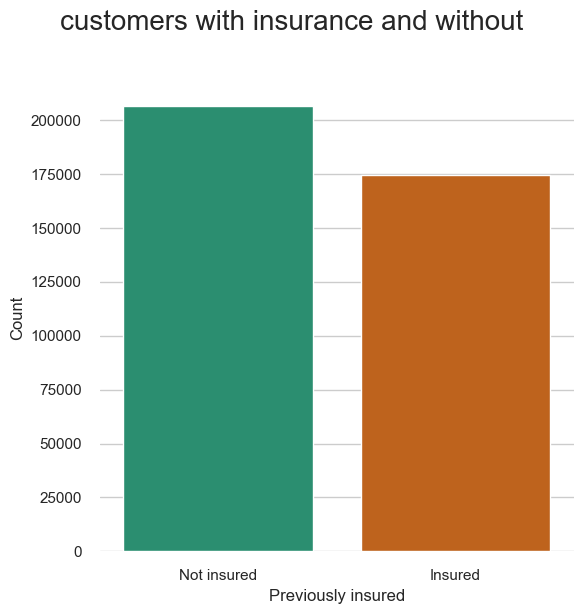

In [11]:
plt.figure(figsize = (6,6))
sns.set(style="whitegrid")   # Set the style to whitegrid
# Create the countplot
ax = sns.countplot(data=numerical, x='Previously_Insured', palette='Dark2')  # Set a custom color palette
# Customize the plot further
plt.suptitle("customers with insurance and without", fontsize=20, y=1.02) 
# Set the custom tick labels
plt.gca().set_xticklabels(['Not insured','Insured'])
plt.ylabel('Count')
plt.xlabel('Previously insured')
# Add some additional styling
sns.despine(left=True, bottom=True)
# Show the plot
plt.tight_layout()
plt.show()

# Insurance Status Analysis

Our analysis reveals an interesting observation:

- **Insurance Status:** Customers without insurance are slightly more numerous than insured customers.

This finding suggests that a significant portion of our customer base falls into the category of non-insured individuals. Further investigation may be required to understand the factors contributing to this distribution and to potentially tailor our insurance offerings to better meet the needs of both insured and non-insured customers.

~~~

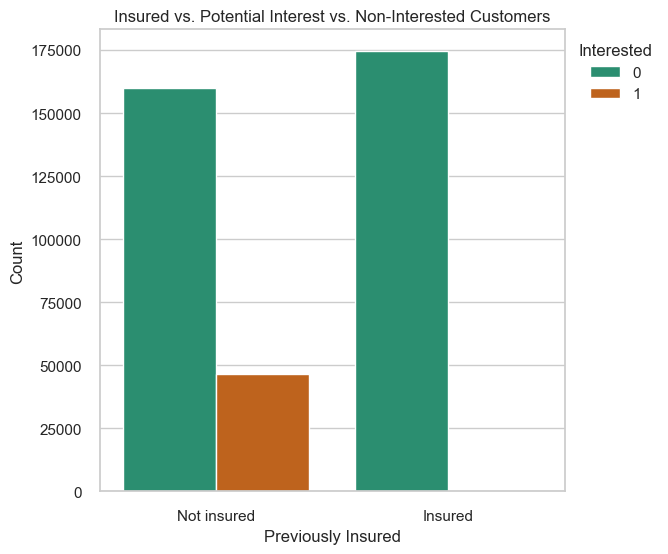

In [12]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.countplot(data=numerical, x='Previously_Insured', hue='Response', palette='Dark2')
plt.title('Insured vs. Potential Interest vs. Non-Interested Customers')
plt.gca().set_xticklabels(['Not insured','Insured'])
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.legend(title='Interested', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Insurance Interest Among the Uninsured

Our analysis reveals a noteworthy observation:

- **Uninsured Customers:** Even among customers without insurance, there is limited interest in taking out insurance on their vehicles.

This finding suggests that the absence of prior insurance coverage does not significantly increase the inclination to obtain vehicle insurance with our company. Further exploration is essential to uncover the underlying reasons and to refine our strategies for engaging this customer segment.

Understanding the preferences and motivations of uninsured customers is crucial for devising targeted approaches to address their specific needs.

~~~

<span style="font-size: 32px; background-color: #990000; color: white; padding: 4px;">Variable Analysis --> Policy Sales Channel</span>

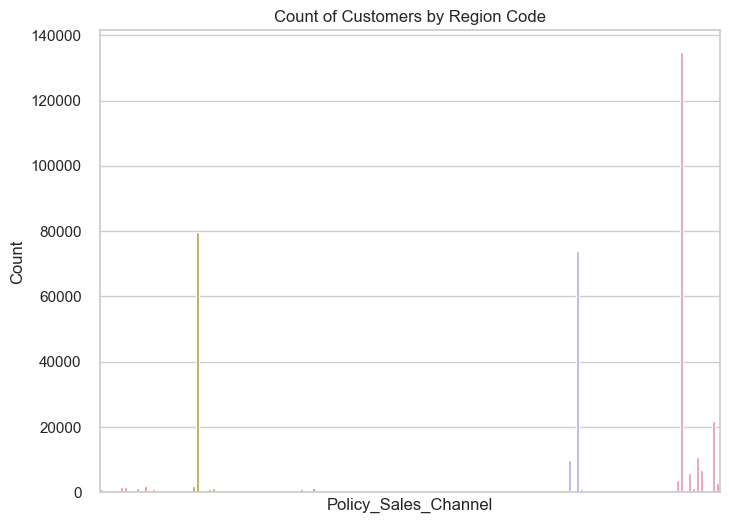

In [13]:
# the ticks on the X-axis were removed as the excessive number was simply impossible to read.
# In any case, it is evident that of all the contact channels, relatively few are used.
# We will focus on those.

region_counts = numerical['Policy_Sales_Channel'].value_counts().reset_index()
region_counts.columns = ['Policy_Sales_Channel', 'Count']

# Create a countplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(data=region_counts, x='Policy_Sales_Channel', y='Count')
plt.title('Count of Customers by Region Code')
plt.xticks([])
plt.ylabel('Count')
plt.show()

In [14]:
channel_counts = numerical['Policy_Sales_Channel'].value_counts()

# Define a threshold to separate the most used and less used channels
threshold = 20000  # Adjust this threshold as needed

# Extract the most used channels (above the threshold) and less used channels (below the threshold)
most_used_channels = channel_counts[channel_counts >= threshold].index
less_used_channels = channel_counts[channel_counts < threshold].index


df_most_used = numerical[numerical['Policy_Sales_Channel'].isin(most_used_channels)]
df_less_used = numerical[numerical['Policy_Sales_Channel'].isin(less_used_channels)]
# Print only most used channel because are very few (less used channels list is much much longer)
print("Most Used Sales Channels:")
for channel in most_used_channels:
    print(channel)

Most Used Sales Channels:
152.0
26.0
124.0
160.0


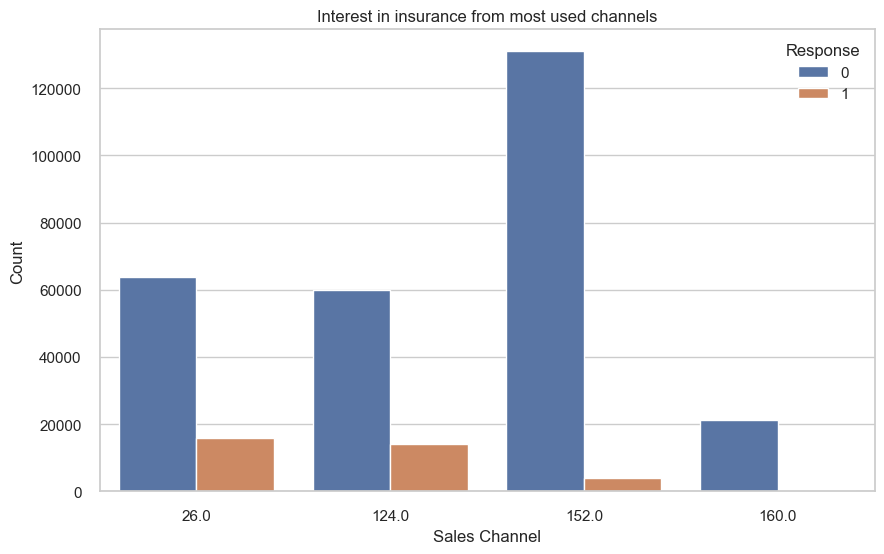

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_most_used, x='Policy_Sales_Channel', hue='Response')
plt.title("Interest in insurance from most used channels")
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.show()

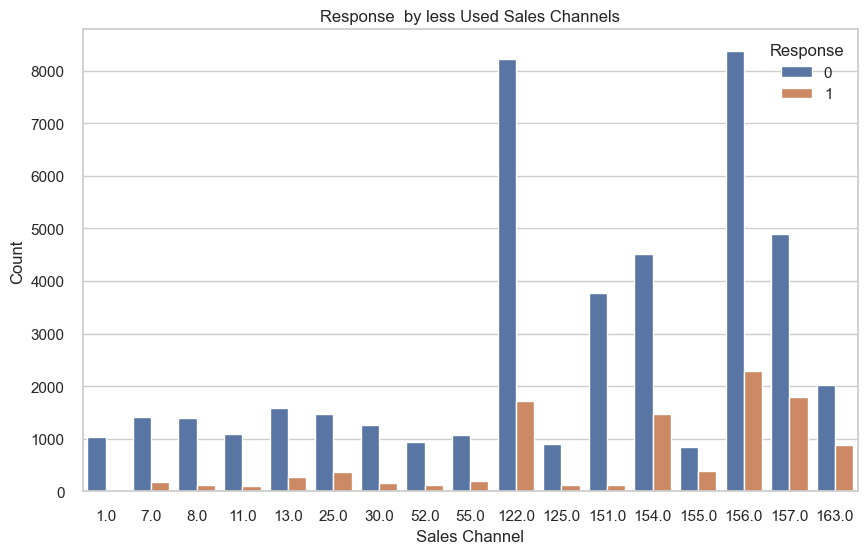

In [16]:
# Here we take the most frequent sales channels from the less frequent overall
channel_counts = df_less_used['Policy_Sales_Channel'].value_counts()

# Get the channels with counts greater than 1000
popular_channels = channel_counts[channel_counts >= 1000].index

# Filter the original DataFrame based on the popular channels
df_less_used_filtered = df_less_used[df_less_used['Policy_Sales_Channel'].isin(popular_channels)]

# Create the countplot using the filtered DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=df_less_used_filtered, x='Policy_Sales_Channel', hue='Response')
plt.title("Response  by less Used Sales Channels")
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.show()

# Analysis Report: Response by Sales Channels

## Most Used Sales Channels

In our analysis of the most frequently used sales channels, it's notable that the predominant response from customers is generally negative. This suggests that even though these channels are heavily utilized, they often result in less favorable responses from customers.

<!-- Add your analysis and visualizations for the most used channels here -->

## Less Used Sales Channels

Similar to the most used sales channels, we observed that even in the less frequently used channels, the predominant customer response tends to be negative. This trend underscores the importance of optimizing the customer experience across all channels, regardless of their frequency of use.

<!-- Add your analysis and visualizations for the less used channels here -->


~~~

<span style="font-size: 32px; background-color: #990000; color: white; padding: 4px;">Variable Analysis --> Vintage</span>

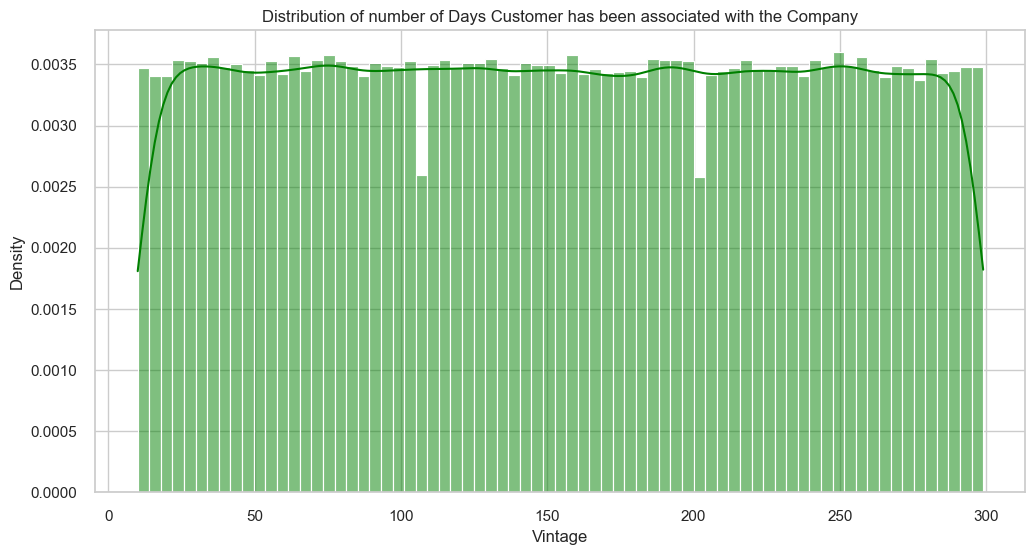

In [17]:
# These are numbers of days a customer was associated to the company
# The nature of this variable is not so clear to me.
plt.figure(figsize = (12,6))
sns.histplot(data=numerical, x='Vintage', kde=True, stat='density',color = 'green')

# Set labels and title
plt.xlabel('Vintage')
plt.ylabel('Density')
plt.title('Distribution of number of Days Customer has been associated with the Company')
# Show the plot
plt.show()

In [18]:
# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(numerical['Vintage'],'uniform')
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The data does not follow a uniform distribution.")
else:
    print("Fail to reject the null hypothesis: The data may follow a uniform distribution.")

KS Statistic: 1.0
P-Value: 0.0
Reject the null hypothesis: The data does not follow a uniform distribution.


## Vintage - Number of Days Customer has been associated with the Company

The "Vintage" feature represents the duration in days for which customers have maintained their relationship with the company. This feature is essential in understanding customer loyalty and engagement.

### Distribution Characteristics

When we examine the distribution of the "Vintage" feature, it exhibits characteristics that resemble a uniform distribution. A uniform distribution implies that the values are equally likely to occur within a certain range. In this case, it suggests that customers tend to be distributed relatively evenly across different durations of association with the company.

### Deviation from Uniformity

However, upon closer inspection, it becomes apparent that the feature deviates from a perfect uniform distribution. There are several observations that fall below a kernel density estimate (KDE) value of 0.0030. This discrepancy suggests that there is a clustering or concentration of customers within specific periods, rather than a perfectly uniform spread.

### Kolmogorov-Smirnov Test

To rigorously assess the uniformity of the "Vintage" feature, a statistical test known as the Kolmogorov-Smirnov (KS) test was performed. The KS test compares the empirical distribution of the feature with the theoretical uniform distribution. In our analysis, the null hypothesis assumed that the "Vintage" feature follows a uniform distribution.

### Test Result

The results of the KS test indicated that we should reject the null hypothesis of uniformity for the "Vintage" feature. This means that the distribution of customer association durations significantly deviates from a uniform pattern. The presence of multiple observations falling below the KDE threshold of 0.0030 further supports the notion that there are clusters or groups of customers who have distinct patterns of association with the company.

### Implications

The deviation from a uniform distribution in the "Vintage" feature suggests that there may be underlying factors or segments within the customer base that influence their association duration. Understanding these patterns and segments can be valuable for customer engagement, retention strategies, and tailoring marketing efforts to different customer groups. 

In summary, while the "Vintage" feature initially appears to follow a uniform distribution, a more detailed examination, along with statistical testing, reveals non-uniform patterns and clusters within the data, highlighting opportunities for targeted business strategies.


~~~

<span style="font-size: 32px; background-color: #990000; color: white; padding: 4px;">Variable Analysis --> Annual Premium</span>

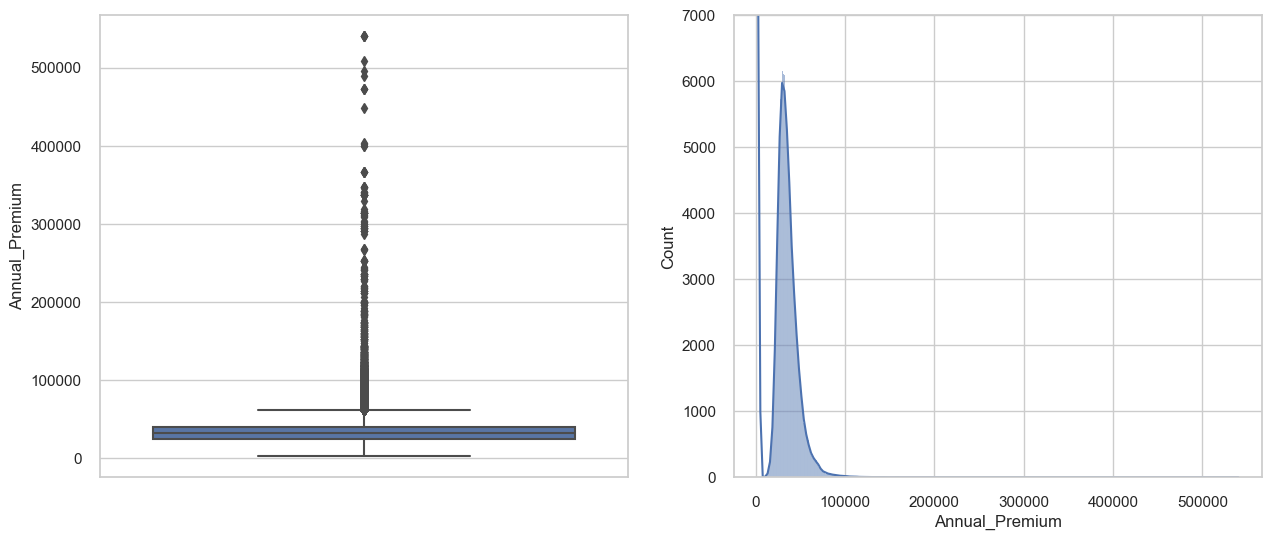

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Assuming 'numerical' is your DataFrame and 'Annual_Premium' is a column in it
sns.histplot(data=numerical, x='Annual_Premium',kde = True, ax = axs[1])
plt.ylim(top = 7000)

sns.boxplot(data = numerical, y = 'Annual_Premium', ax = axs[0])
# Show the plot
plt.show()

In [20]:
print(f"Skewness: {round(stats.skew(numerical['Annual_Premium']),3)}")
print(f"Kurtosis: {round(stats.kurtosis(numerical['Annual_Premium']),3)}")

Skewness: 1.766
Kurtosis: 34.004


## Annual Premium

The "Annual Premium" variable represents the annual insurance premium paid by customers, which is a crucial financial metric for the insurance company. In this report, we will focus on key characteristics of this variable, including the presence of outliers, kurtosis, skewness, and unusual values.

### Presence of Outliers

Upon analyzing the "Annual Premium" variable, it is evident that there is a massive presence of outliers in the dataset.
These extreme values can have a substantial impact on summary statistics and may need to be addressed in data preprocessing.

### High Level of Kurtosis

The kurtosis of the "Annual Premium" variable is exceptionally high, with a value of around 34. Kurtosis measures the tail behavior of a distribution, indicating whether the dataset has heavy tails (leptokurtic), light tails (platykurtic), or tails similar to a normal distribution (mesokurtic). In this case, the high kurtosis value highlights that there are many extreme values present in the tail of the distribution. This suggests that the dataset exhibits leptokurtic characteristics, with a greater number of data points in the tails than a normal distribution.

### Positive Skewness

The skewness of the "Annual Premium" variable is positively skewed, with a value of 1.766. Positive skewness indicates that the majority of the data points are concentrated to the left of the distribution, with a tail extending to the right. This skewness level suggests that most of the data values are lower, and there are relatively few higher values.

### Unusual Values

Additionally, there are some unusual values located to the far left of the distribution. These extreme values are clearly visible in the graphical representation of the data and are likely to be outliers. Given their extreme nature and potential to distort analyses, consideration should be given to removing or handling these values appropriately during data preprocessing.

In summary, the "Annual Premium" variable exhibits several noteworthy characteristics, including the presence of numerous outliers, a high level of kurtosis indicating extreme values in the tail, and positive skewness indicating data concentration on the left side. Additionally, there are unusual values that may require special attention. Addressing these characteristics is essential for robust data analysis and modeling.


~~~

> # CORRELATION ANALYSIS

In [21]:
corr_matrix = numerical.corr()

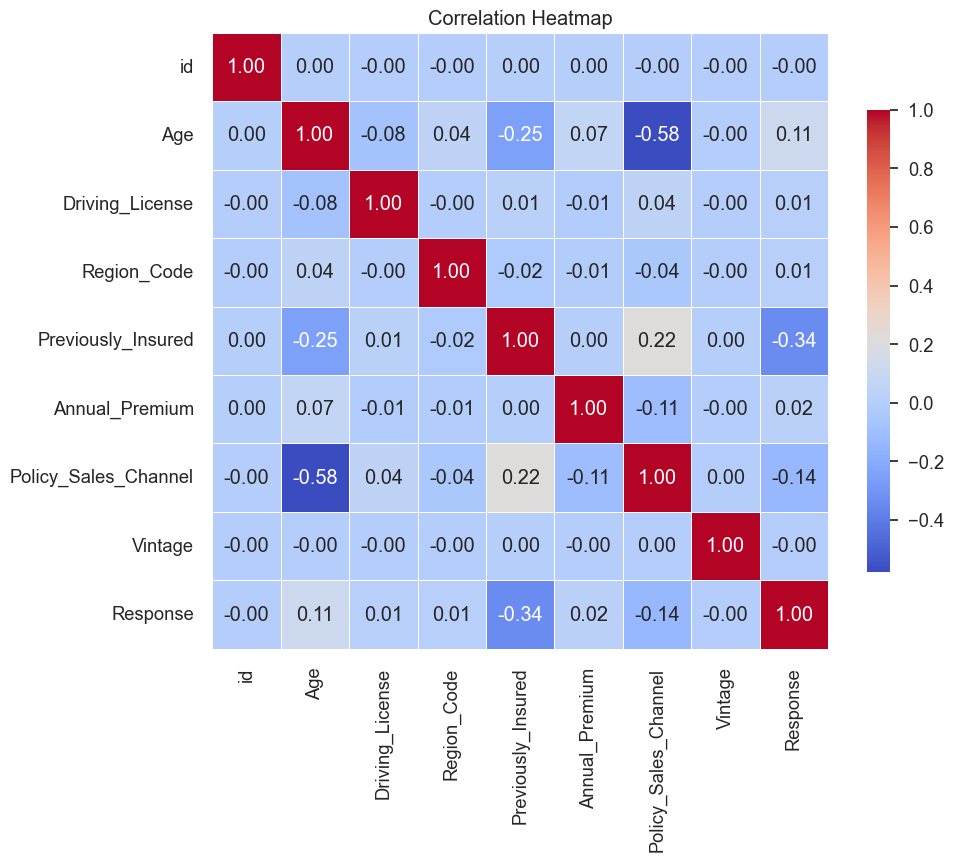

In [22]:
# Set up the figure and axes
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Customize the heatmap appearance
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})

# Add a title
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

In [23]:
# Check for multicollinearity
data = numerical.drop('Response',axis = 1)
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  

vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

                feature        VIF
0                    id   3.976952
1                   Age  10.457630
2       Driving_License  37.690580
3           Region_Code   4.954198
4    Previously_Insured   1.986389
5        Annual_Premium   4.174946
6  Policy_Sales_Channel   7.750265
7               Vintage   4.373295


# Variance Inflation Factor (VIF) Analysis Report

In this analysis, we have calculated the VIF values for the predictor variables in our dataset to assess multicollinearity. Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other, which can lead to unstable coefficient estimates and reduced model interpretability.

## VIF Results

Here are the VIF values for each predictor variable:

- **Age**: 10.46
- **Driving_License**: 37.69
- **Region_Code**: 4.95
- **Previously_Insured**: 1.99
- **Annual_Premium**: 4.17
- **Policy_Sales_Channel**: 7.75
- **Vintage**: 4.37

## Interpretation

1. **Age**: The VIF for Age is relatively high at 10.46, indicating that Age may have high multicollinearity with other predictor variables in the dataset. This suggests that Age is strongly correlated with one or more other variables.

2. **Driving_License**: The VIF for Driving_License is extremely high at 37.69, indicating a significant multicollinearity issue. This variable is highly correlated with other predictors and may need special attention during preprocessing.

3. **Region_Code**: Region_Code has a VIF of 4.95, indicating moderate multicollinearity. While not as severe as Driving_License, it still suggests some correlation issues.

4. **Previously_Insured**, **Annual_Premium**, **Policy_Sales_Channel**, and **Vintage**: These variables have relatively lower VIF values, suggesting that multicollinearity may be less of a concern for them.

## Multicollinearity Handling

To address multicollinearity, consider the following steps in the preprocessing phase:

1. **Feature Selection**: Evaluate whether all highly correlated variables are essential for your analysis. You may choose to remove some redundant variables or combine them if they represent similar information.

2. **Principal Component Analysis (PCA)**: PCA can be used to reduce dimensionality and mitigate multicollinearity by transforming variables into uncorrelated principal components.

3. **Regularization**: If you plan to build a regression model, consider using regularization techniques such as Ridge or Lasso regression, which can help reduce the impact of multicollinearity on coefficient estimates.

4. **Data Transformation**: In some cases, transforming variables or creating interaction terms can help reduce multicollinearity.

---

*Note: Multicollinearity is a common issue in regression analysis, and addressing it appropriately is crucial for the reliability of your model.*


# Correlation Analysis Report

In this analysis, we examined the correlation between numerical variables in our dataset. The most notable correlation we observed was a **moderate negative correlation** of **-0.58** between **Age** and **Policy Channels**.

## Correlation Details

- **Age vs. Policy Channels**: The correlation coefficient between Age and Policy Channels is -0.58. This indicates a moderate negative relationship between the two variables.

## Interpretation

The negative correlation between Age and Policy Channels suggests that there is some degree of association between a policyholder's age and their choice of policy channels. However, it's important to note that the correlation, while statistically significant, is not extremely strong.

Possible interpretations of this negative correlation include:

- As policyholders get older, they may be less likely to use certain policy channels.
- Different age groups may have varying preferences for how they interact with policies.

It's essential to conduct further analysis and gather additional context to fully understand the implications of this correlation.

## Conclusion
In summary, our analysis revealed that all correlations observed in the dataset are weak. The strongest of these weak correlations is a moderate negative correlation between Age and Policy Channels.

~~~

<span style="font-size: 52px; background-color: #228B22; color: white; padding: 4px;">CATEGORICAL VARIABLES</span>

In [24]:
categorical = train.select_dtypes(exclude = (np.number))

In [25]:
categorical.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


<span style="font-size: 32px; background-color: #228B22; color: white; padding: 4px;">Variable Analysis --> Vehicle Age</span>

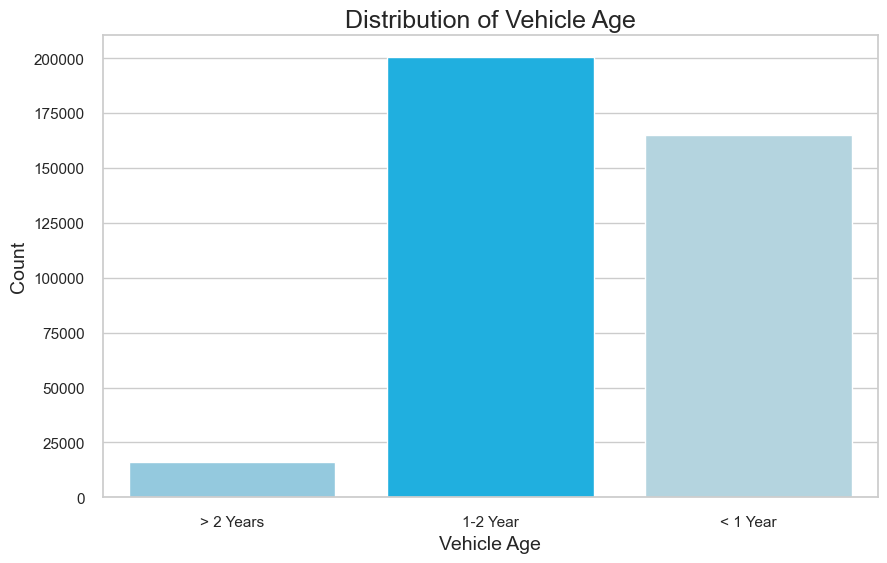

In [26]:
# Set a custom color palette (optional)
custom_palette = ["#87CEEB","#00BFFF","#ADD8E6"]  # Shades of Blue

# Create the countplot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set the background style

# Create the countplot with custom palette and add labels
sns.countplot(data=categorical, x='Vehicle_Age', palette=custom_palette)
plt.title("Distribution of Vehicle Age", size=18)  # Add a title
plt.xlabel("Vehicle Age", size=14)  # Label for x-axis
plt.ylabel("Count", size=14)  # Label for y-axis

# Show the plot
plt.show()


# Vehicle Age Analysis Report

In our dataset, the variable "Vehicle Age" provides insights into the age distribution of vehicles. Based on the data, we can observe the following trends:

- **Very Few Vehicles > 2 Years**: The majority of vehicles in the dataset have an age of less than 2 years. This suggests that a significant portion of the vehicles being analyzed is relatively new.

- **Most Vehicles Have 1-2 Years**: The most common category for vehicle age falls within the range of 1 to 2 years. This indicates that a substantial number of vehicles in the dataset are relatively young, likely representing newer models.

- **Significant Amount < 1 Year**: There is also a notable proportion of vehicles with an age of less than 1 year. This implies that a considerable portion of the vehicles is brand new or nearly new.

The distribution of vehicle age provides valuable information about the composition of the vehicle fleet in our dataset, with a focus on newer vehicles.

<span style="font-size: 32px; background-color: #228B22; color: white; padding: 4px;">Variable Analysis --> Vehicle Damage</span>

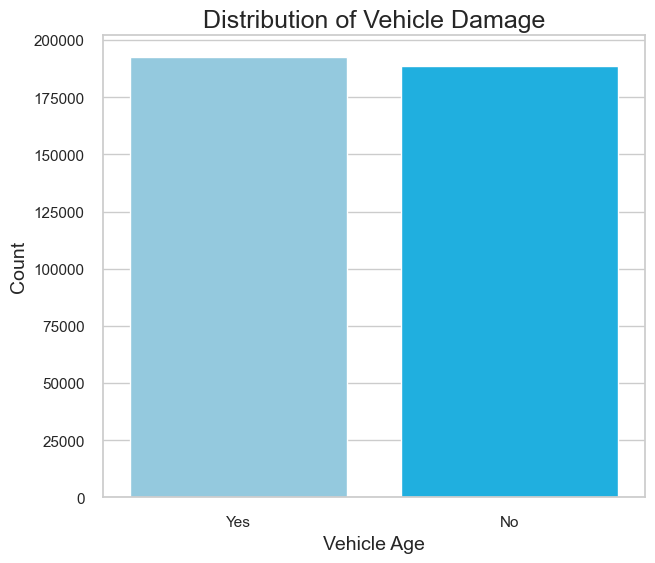

In [27]:
# Set a custom color palette (optional)
custom_palette = ["#87CEEB","#00BFFF"]  # Shades of Blue

# Create the countplot
plt.figure(figsize=(7, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set the background style

# Create the countplot with custom palette and add labels
sns.countplot(data=categorical, x='Vehicle_Damage', palette=custom_palette)
plt.title("Distribution of Vehicle Damage", size=18)  # Add a title
plt.xlabel("Vehicle Age", size=14)  # Label for x-axis
plt.ylabel("Count", size=14)  # Label for y-axis

# Show the plot
plt.show()

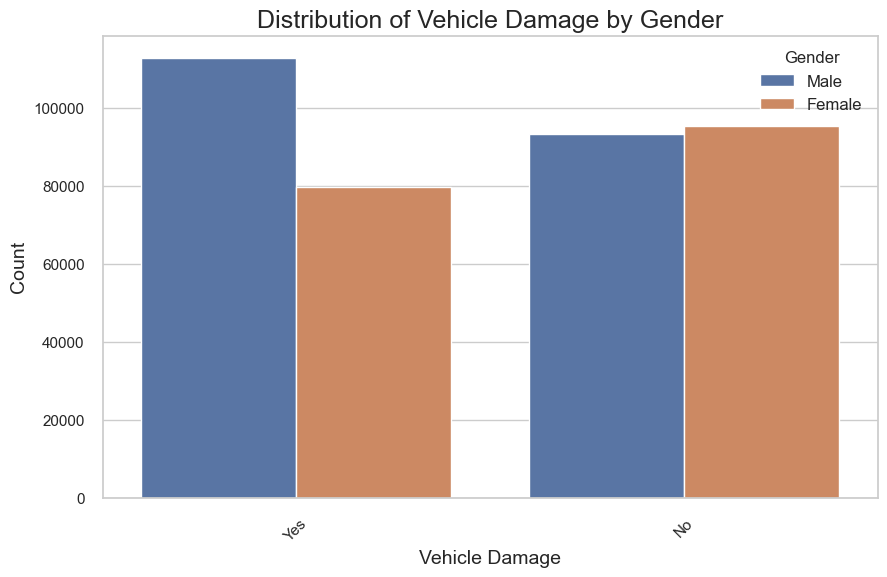

In [28]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set the background style

# Create the countplot with custom palette and add labels, differentiating by gender
sns.countplot(data=categorical, x='Vehicle_Damage', hue='Gender')
plt.title("Distribution of Vehicle Damage by Gender", size=18)  # Add a title
plt.xlabel("Vehicle Damage", size=14)  # Label for x-axis
plt.ylabel("Count", size=14)  # Label for y-axis

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.legend(title="Gender", title_fontsize=12, fontsize=12)
plt.show()


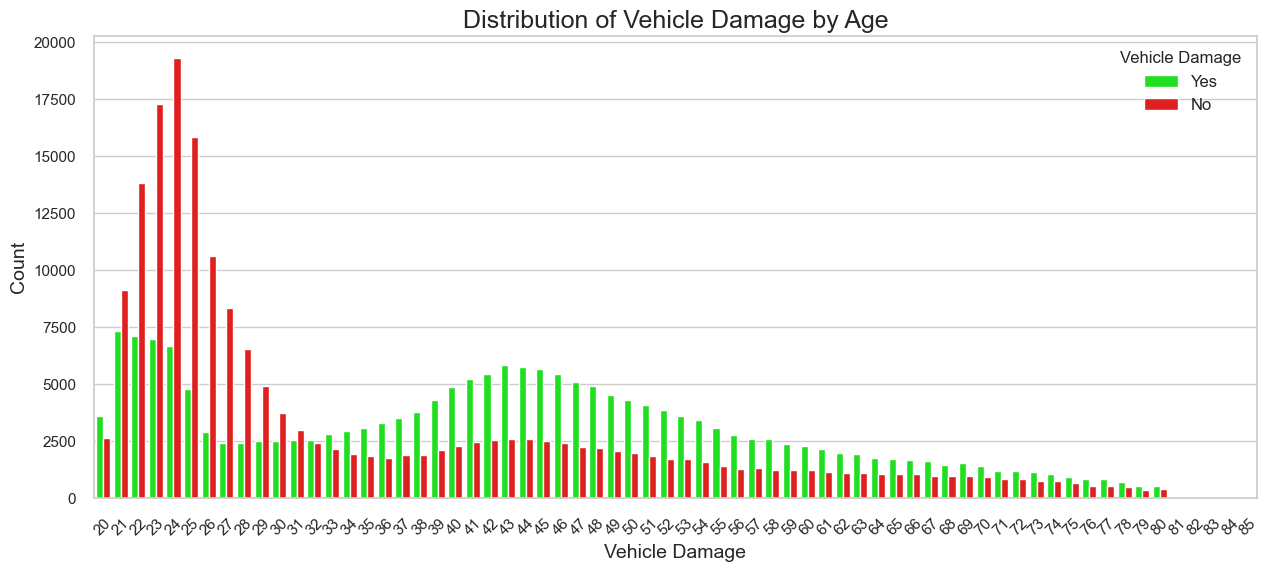

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette (optional)
custom_palette = ["#00FF00","#FF0000"]

# Create the countplot
plt.figure(figsize=(15, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set the background style

# Create the countplot with custom palette and add labels, differentiating by gender
sns.countplot(data=train, x='Age', hue='Vehicle_Damage', palette=custom_palette)
plt.title("Distribution of Vehicle Damage by Age", size=18)  # Add a title
plt.xlabel("Vehicle Damage", size=14)  # Label for x-axis
plt.ylabel("Count", size=14)  # Label for y-axis

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.legend(title="Vehicle Damage", title_fontsize=12, fontsize=12)
plt.show()


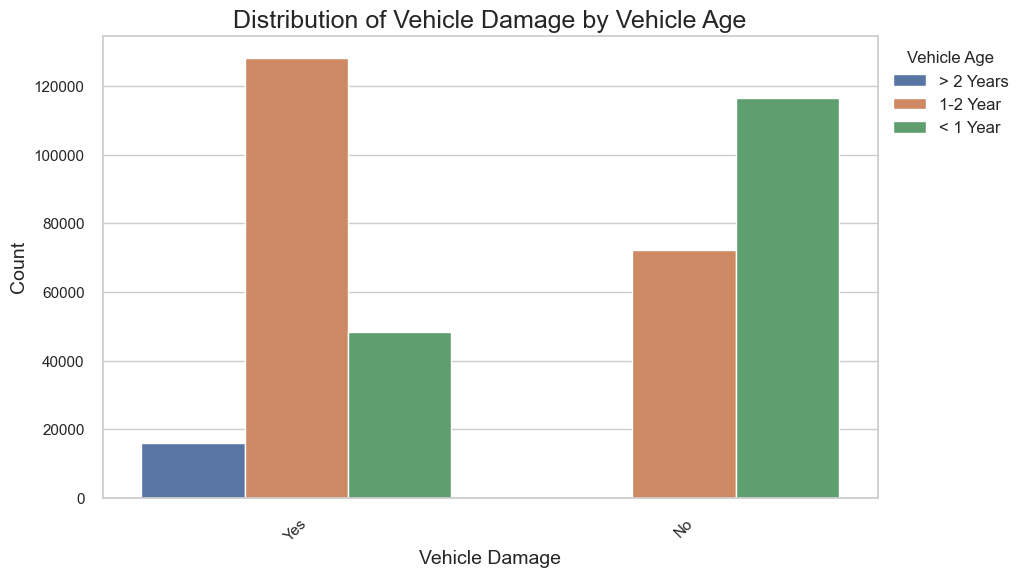

In [30]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set the background style

# Create the countplot with custom palette and add labels, differentiating by gender
sns.countplot(data=categorical, x='Vehicle_Damage', hue='Vehicle_Age')
plt.title("Distribution of Vehicle Damage by Vehicle Age", size=18)  # Add a title
plt.xlabel("Vehicle Damage", size=14)  # Label for x-axis
plt.ylabel("Count", size=14)  # Label for y-axis

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.legend(title="Vehicle Age", title_fontsize=12, fontsize=12,loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Vehicle Damage Analysis Report

In our analysis of the "Vehicle Damage" variable, we made the following observations:

- **Vehicle Damage Categories**:
  - **YES**: Customers who have had their vehicles damaged in the past.
  - **NO**: Customers who haven't had their vehicles damaged in the past.

- **Overall Distribution**:
  - Vehicles that have suffered damage in the past are slightly more common than those that have not.

- **Gender Comparison**:
  - Male drivers are more likely to drive vehicles that have been damaged in the past.
  - Conversely, female drivers are more likely to drive vehicles that have never been damaged.

- **Age and Damage Relationship**:
  - A notable age-related trend exists regarding vehicle damage:
    - Male and female drivers tend to have different patterns of vehicle damage based on age.
    - Young people aged between 20 and 30 tend to drive vehicles that have never been damaged.
    - Beyond the age of 31, the trend completely reverses, indicating that older individuals are more likely to drive vehicles that have experienced past damage.

- **Vehicle Age and Damage Relationship**:
  - The vehicles less than two years old in the dataset have all suffered some damage in the past.
  - Vehicles between one and two years old have mostly suffered damage.
  - Vehicles over one year old are those that have suffered the least damage in the past.

These findings provide comprehensive insights into the relationship between "Vehicle Damage," gender, age, and the age of the vehicles themselves. Understanding these patterns can be valuable for tailoring marketing, insurance, or customer service strategies to different demographic groups and vehicle ages.

<span style="font-size: 32px; background-color: #228B22; color: white; padding: 4px;">Variable Analysis --> Gender</span>

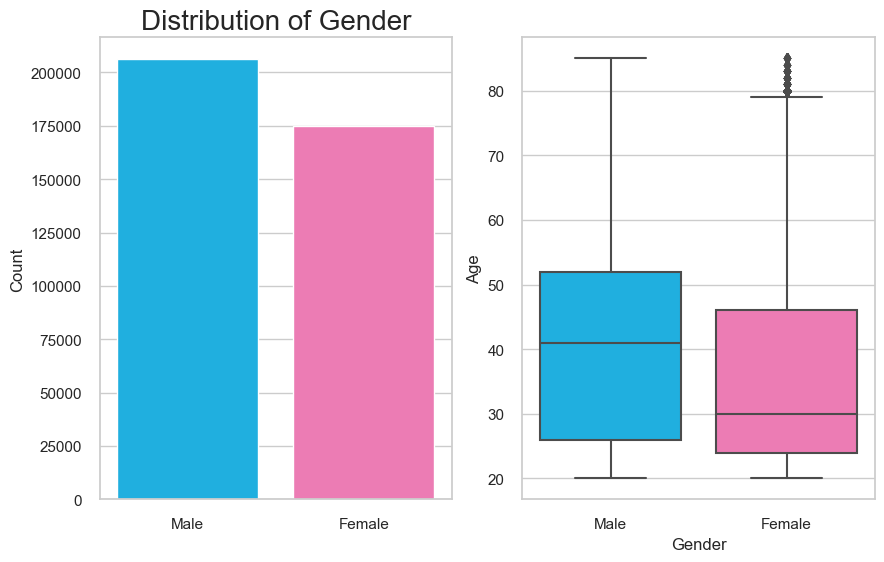

In [31]:
# Set a custom color palette (optional)
custom_palette = ["#00BFFF", "#FF69B4"]  # Blue and Pink

# Create the countplot
fig,axs = plt.subplots(1,2,figsize = (10,6))
sns.set(style="whitegrid")  # Set the background style

# Create the countplot with custom palette and add labels
sns.countplot(data=categorical, x='Gender', palette=custom_palette, ax = axs[0])
axs[0].set_title("Distribution of Gender",size = 20)  # Add a title
axs[0].set_xlabel(" ")  # Label for x-axis
axs[0].set_ylabel("Count")  # Label for y-axis
sns.boxplot(data = train, x = 'Gender', y = 'Age',palette = custom_palette, ax = axs[1])
axs[0].set_title("Distribution of Gender",size = 20)  # Add a title
axs[0].set_xlabel(" ")  # Label for x-axis
axs[0].set_ylabel("Count")  # Label for y-axis

# Rotate x-axis labels for better readability (if needed)
# Show the plot
plt.show()


# Gender Distribution and Age Analysis Report

In our analysis of the "Gender" variable, we made the following observations:

- **Gender Distribution**:
  - Males are slightly more prevalent in our dataset compared to females. This suggests a slight gender imbalance among the individuals in our dataset.

- **Age Comparison**:
  - There is a notable age difference between male and female individuals:
    - Male individuals tend to be generally older than their female counterparts.

These findings provide insights into the distribution of gender and the age differences between male and female individuals in our dataset. Understanding these patterns can be valuable for tailoring marketing, product offerings, or services to different demographic groups.

> # CORRELATION ANALYSIS (CHI-SQUARE TEST)

In [32]:
# Extracting column names 
column_names = categorical.columns
# Assiging column names to row indexs 
chisqmatrix=pd.DataFrame(categorical,columns=column_names,index=column_names)

In [33]:
for icol in column_names:  # Loop over each column (categorical variable) in the DataFrame.
    for jcol in column_names:  # Nested loop to compare with each other column.

        # Create a contingency table for the two categorical columns icol and jcol.
        mycrosstab = pd.crosstab(categorical[icol], categorical[jcol])

        # Perform a chi-square test of independence on the contingency table.
        chi2,_,_,_ = stats.chi2_contingency(mycrosstab)

        # Calculate Cramér's V for the association between icol and jcol.
        n = mycrosstab.values.sum()  # Calculate the total number of observations.
        V = round(np.sqrt(chi2 / (n * (min(mycrosstab.shape) - 1))),3)  # Compute Cramér's V.
        #V = round(V, 3)  # Round the value to three decimal places for readability.

        # Store the calculated Cramér's V value in the chisqmatrix DataFrame.
        chisqmatrix.loc[icol, jcol] = V
        
# Make values inside chisq matrix float
chisqmatrix = chisqmatrix.astype(float)

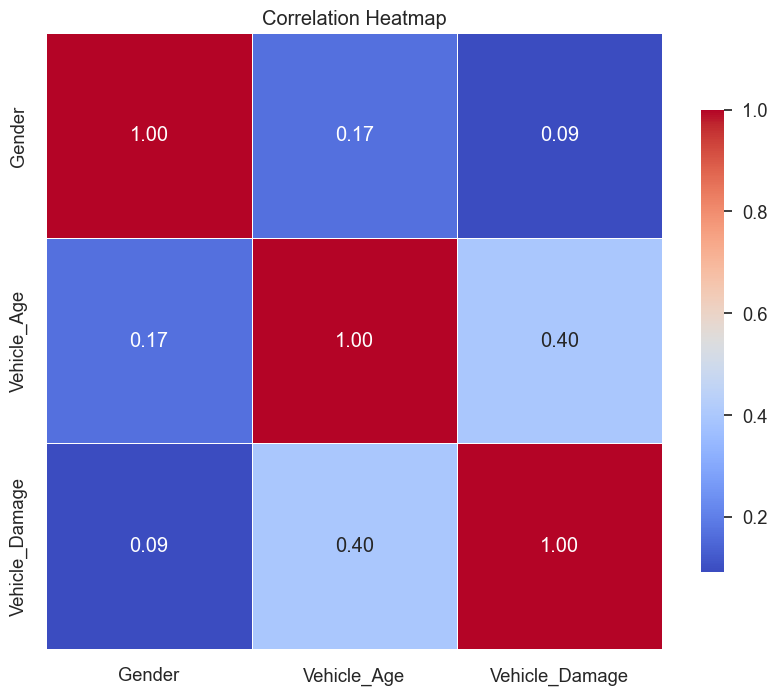

In [34]:
# Set up the figure and axes
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Customize the heatmap appearance
sns.heatmap(chisqmatrix, annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})

# Add a title
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

# Chi-Square Test for categorical variables

In this analysis, we conducted a Chi-Square test to examine the relationship between categorical variables. The Chi-Square test assesses whether there is a statistically significant association between two categorical variables.

## Correlation Details

- **Correlation Coefficient**: The correlation coefficient between "Vehicle Age" and "Vehicle Damage" is 0.40. This positive correlation suggests a moderate but not extremely strong relationship between the two variables.

## Chi-Square Test Results

We conducted a Chi-Square test to assess the statistical significance of this correlation. The results of the Chi-Square test indicate whether the observed association is statistically significant or if it could have occurred by random chance.

~~~

> # PREPROCESSING

In [35]:
# the ID column does not provide us with any particularly interesting information.
# It might have been useful to use as a merge column with perhaps another dataset,
# but on its own it is useless to us, so we delete it
train.drop('id',axis = 1,inplace = True)

In [36]:
features = ['Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

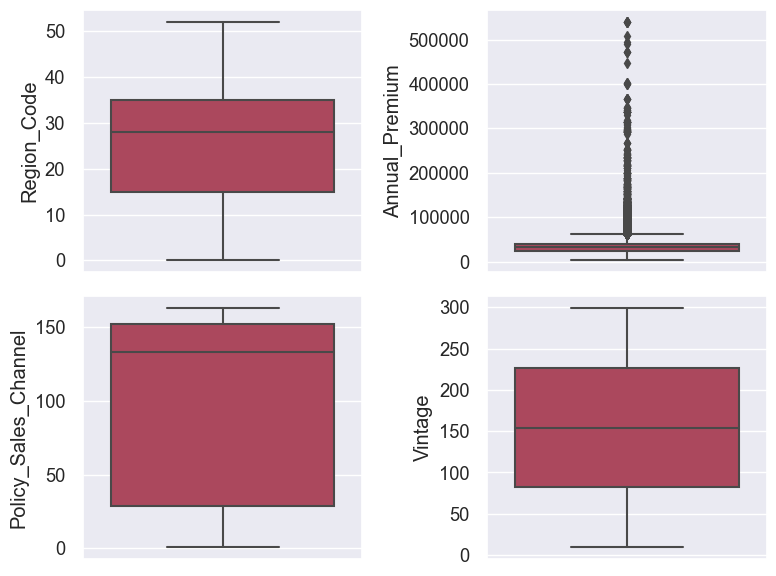

In [37]:
# As you can see the only feature with outliers is 'Annual_Premium'
fig,axs = plt.subplots(2,2,figsize = (8,6))

for idx, feature in enumerate(features):
    row = idx // 2  # Determine the row index
    col = idx % 2   # Determine the column index
    
    sns.boxplot(data=train, y=feature, ax=axs[row, col],palette= 'inferno')
plt.tight_layout()
plt.show()

<Axes: xlabel='Annual_Premium', ylabel='Density'>

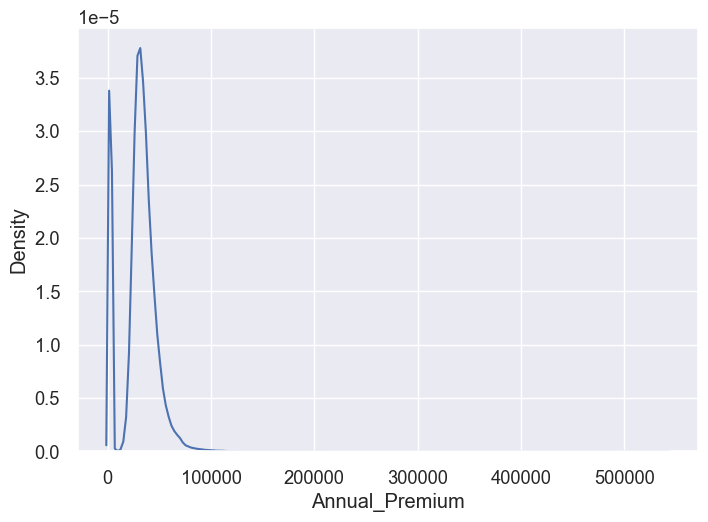

In [38]:
# As you can see here we got a bimodal distribution, we can treat the lower distribution (the thinnest) as an outlier and remove it (the easy way).
# Or we can try to split Annual Premium in 2 different features, one contain higher Annual premium and the other contain low Premium
sns.kdeplot((train['Annual_Premium']))

In [39]:
# Find the minimum is easy, we can start the low Annual premium feature from here
train['Annual_Premium'].min()

2630.0

(3043.0, 3044.0)

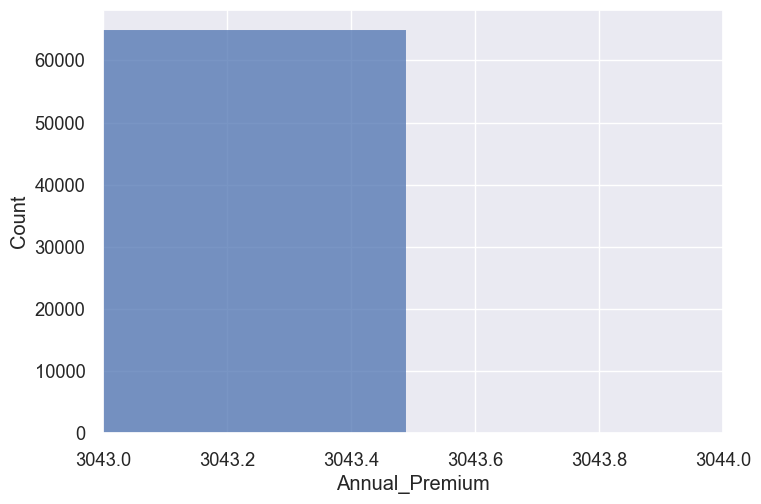

In [40]:
# To find where the upper bound of low premium distribution we can do some hard coding and zoom more and more until we can see that
# probably the end of the low distribution is between 3043 and 3044.
# 3043,5 more or less.
data = train['Annual_Premium']
sns.histplot(data)
plt.xlim(3043,3044)

In [41]:
def integral(data, feature, start_point, end_point):
    # Calculate the area under the entire 'feature' column
    x_total = np.linspace(data[feature].min(), data[feature].max(), num=len(data[feature]))
    y_total = data[feature]
    total_area = trapezoid(y_total, x_total)  # Define or replace trapezoid function

    # Calculate the area between the start and end points using trapezoidal approximation
    x_point = np.linspace(start_point,end_point,num = len(data[feature]))  # Create an array with two points
    y_point = data[feature]
    area_between_points = trapezoid(y_point, x_point)  # Define or replace trapezoid function

    # Check for division by zero
    if total_area == 0:
        return "The total area is zero, cannot calculate the percentage."

    # Calculate the percentage of the area
    percentage_area = (area_between_points / total_area) * 100

    return f"The percentage of the area under the curve between {start_point} and {end_point} is about: {percentage_area:.2f}%"


In [42]:
# try to calculate the value under the curve of the lower premium and then under the higher.
upper_bound = 3043.5
lower_bound = train['Annual_Premium'].min()

In [43]:
# If we decide to cut off the lower premium we trash about 0.08% of the data
integral(train,'Annual_Premium',lower_bound,upper_bound)

'The percentage of the area under the curve between 2630.0 and 3043.5 is about: 0.08%'

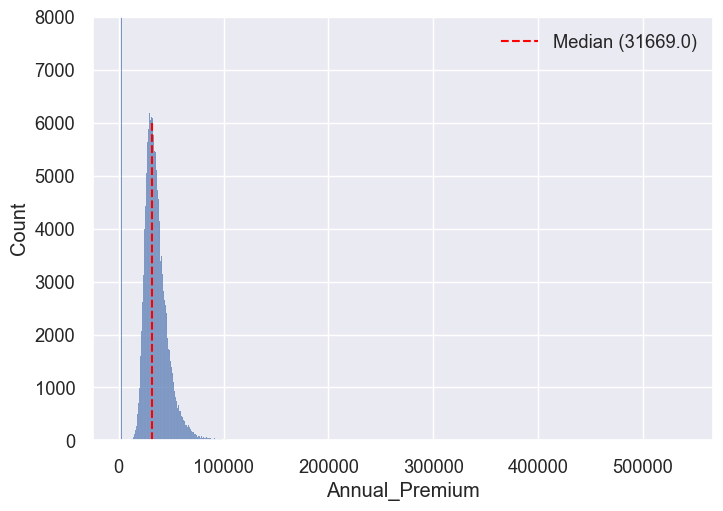

In [44]:
# Looking at this rough graph below we could see that most of the data are between 20.000 and 50.000
# we can try to calculate the area under the curve to check in effect how many observations fall between these
# boundaries.
sns.histplot(data)
plt.axvline(x = data.median(),ymax=6000/8000, color = 'red',linestyle = '--', label=f'Median ({round(data.median(),3)})')
plt.ylim(0,8000)
plt.legend()
plt.show()

In [45]:
# Try to calculate total Area from the min to the median value and from the median value to the max of distribution
print(f"Total Area BEFORE Median value: {integral(numerical,'Annual_Premium',numerical['Annual_Premium'].min(),numerical['Annual_Premium'].median())}")
print(f"Total Area AFTER Median value: {integral(numerical,'Annual_Premium',numerical['Annual_Premium'].median(),numerical['Annual_Premium'].max())}")

Total Area BEFORE Median value: The percentage of the area under the curve between 2630.0 and 31669.0 is about: 5.40%
Total Area AFTER Median value: The percentage of the area under the curve between 31669.0 and 540165.0 is about: 94.60%


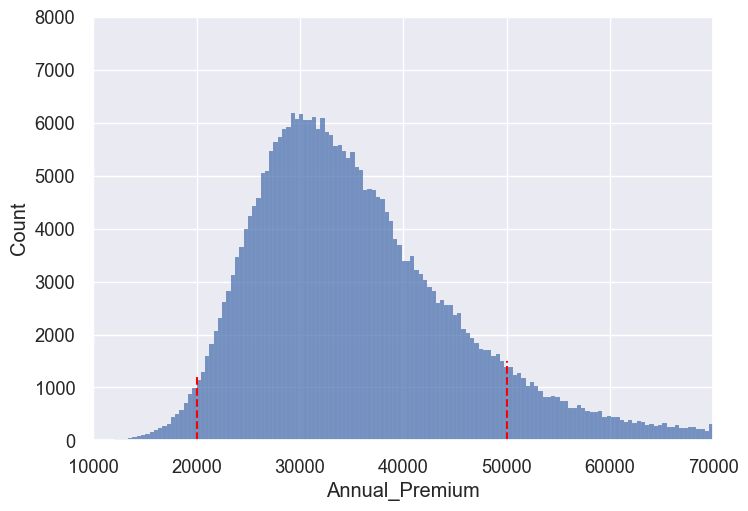

In [46]:
# Looking at this rough graph below we could see that most of the data are between 20K and 50K
sns.histplot(data)
plt.xlim(10000,70000)
plt.ylim(0,8000)
plt.axvline(x = 20000,ymax = 1200/8000,color = 'red',linestyle = '--')
plt.axvline(x = 50000,ymax = 1500/8000,color = 'red',linestyle = '--')
plt.show()

In [47]:
# most frequent values cover only about 6% of the area.
integral(train,'Annual_Premium',20000,50000)

'The percentage of the area under the curve between 20000 and 50000 is about: 5.58%'

# Outliers Analysis for Annual Premium

In this analysis, we'll examine the outliers in the variable "Annual Premium" and understand their distribution.

## Proportion of Outliers

To start, let's determine the proportion of outliers in the dataset:

- The Area under the curve to the left of the Median value cover only 5.40% of the total.

- The area under the curve to the right of the distribution cover 94.60% of the total 

- Interestingly, the area with most of the values cover only a 6% of the entire area.

By understanding the nature of these outliers, we can make informed decisions on how to handle them in our analysis or modeling processes.

~~~

*Before completely eliminating any outliers without leaving a trace,let us try to transform the variable to see if we can reduce the impact of these outliers and bring it to a more 'Gaussian' condition*

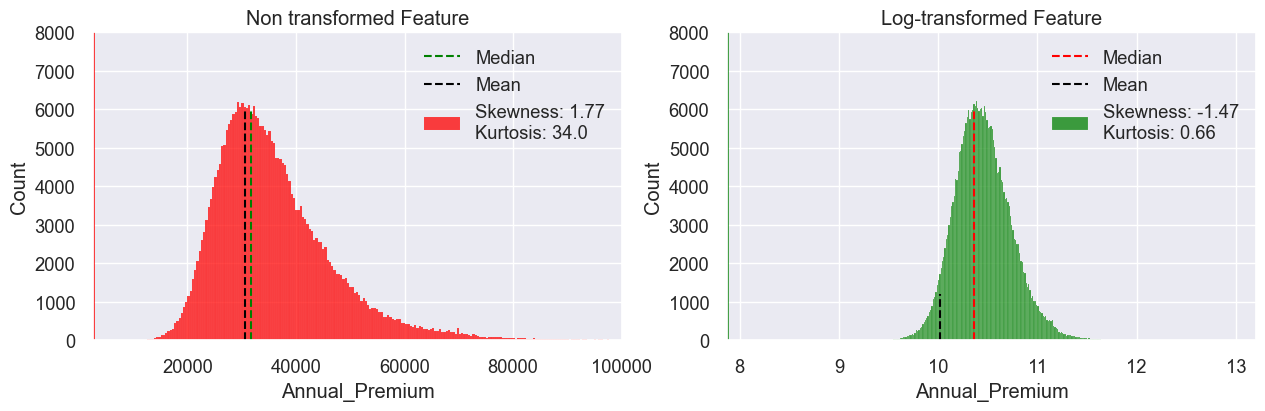

In [48]:
# Here we try to make a log transformation and visualize the difference between transformed and non transformed distribution

fig,axs = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data = train, x = 'Annual_Premium',color = 'red',
             label = f"Skewness: {round(stats.skew(data),2)}\nKurtosis: {round(stats.kurtosis(data),2)}",ax = axs[0])
axs[0].set_xlim(data.min(),100000)
axs[0].set_ylim(0,8000)
axs[0].set_title('Non transformed Feature')
axs[0].axvline(x = data.median(),ymax = 6000/8000,color = 'green',linestyle ='--', label='Median')
axs[0].axvline(x = data.mean(),ymax = 6000/8000,color = 'black',linestyle ='--', label='Mean')
axs[0].legend()


log_transformed = np.log(train['Annual_Premium'])
sns.histplot(log_transformed,color = 'green',
             label = f"Skewness: {round(stats.skew(log_transformed),2)}\nKurtosis: {round(stats.kurtosis(log_transformed),2)}",ax=axs[1])
axs[1].set_title('Log-transformed Feature')
axs[1].axvline(x = log_transformed.median(),ymax = 6000/8000,color = 'red',linestyle ='--',label = 'Median')
axs[1].axvline(x = log_transformed.mean(),ymax = 1200/8000,color = 'black',linestyle ='--', label = 'Mean')
axs[1].set_xlim(log_transformed.min(), log_transformed.max())
axs[1].set_ylim(0,8000)
axs[1].legend()

plt.show()

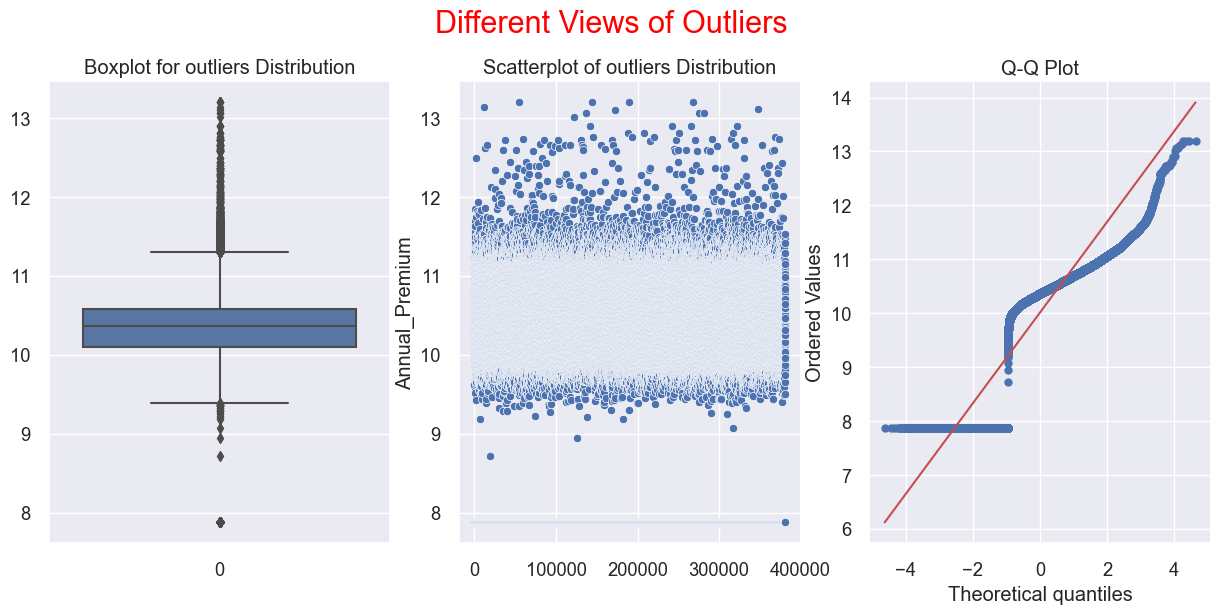

In [49]:
# Highlight points below the threshold
fig, axs = plt.subplots(1,3,figsize = (15,6))

plt.suptitle('Different Views of Outliers', color='red', size=22, y=1)

# BOXPLOT outliers
sns.boxplot(log_transformed,ax = axs[0])
axs[0].set_title('Boxplot for outliers Distribution')
# SCATTERPLOT outliers
sns.scatterplot(log_transformed,ax = axs[1])
axs[1].set_title('Scatterplot of outliers Distribution')
# Q-Q plot for testing against a normal distribution
stats.probplot(log_transformed, dist="norm",fit = True, plot = axs[2])
axs[2].set_title('Q-Q Plot')
plt.show()

# Analysis of Outliers for 'Annual Premium' Variable Pt.2

1. **Logarithmic Transformation**: We will initially apply a logarithmic transformation to the 'Annual Premium' variable. This transformation is often employed to make a variable's distribution more closely resemble a Gaussian distribution. We will assess how this transformation affects the kurtosis and skewness of the distribution.

2. **Outlier Detection and Removal**: After implementing the logarithmic transformation, we will use a suitable method to identify and remove outliers—data points that deviate significantly from the majority of the data. This step aims to enhance the robustness of our analysis.

## Logarithmic Transformation

The 'Annual Premium' variable may contain outliers, which can distort its distribution. By applying a logarithmic transformation, we can mitigate the impact of these outliers and potentially achieve a more Gaussian-like distribution. The key characteristics we will examine are:

- **Kurtosis**: A measure of the tail heaviness of the distribution. High kurtosis indicates heavy tails, while low kurtosis indicates light tails. A kurtosis value close to 0 suggests a distribution closer to normal.
We reduce Kurtosis from 34 to almost 0 simply log transform the distribution!.

- **Skewness**: A measure of the asymmetry of the distribution. Positive skewness indicates a right-skewed distribution (tail on the right), while negative skewness indicates a left-skewed distribution (tail on the left).
We see that we switch from a right skewness to a left skewness due to some outliers

In [50]:
# START LOG TRANFORMING THE FEATURE
train['Annual_Premium'] = np.log(train['Annual_Premium'])

In [51]:
# Use tukey method to remove outliers
# NOTE: The lower and upper bound are choosen arbitrarly after inspected aoutliers distribution
Q1 = np.percentile(train['Annual_Premium'],25)
Q3 = np.percentile(train['Annual_Premium'],75)
IQR = Q3 - Q1
lower_bound = 2.5
upper_bound = 3

In [52]:
Inner_fence = Q1 - (lower_bound * IQR)
Outer_fence = Q3 + (upper_bound * IQR)

print(f"Inner fence is: {Inner_fence}\nOuter fence is: {Outer_fence}")

Inner fence is: 8.905098840909307
Outer fence is: 12.018454456180354


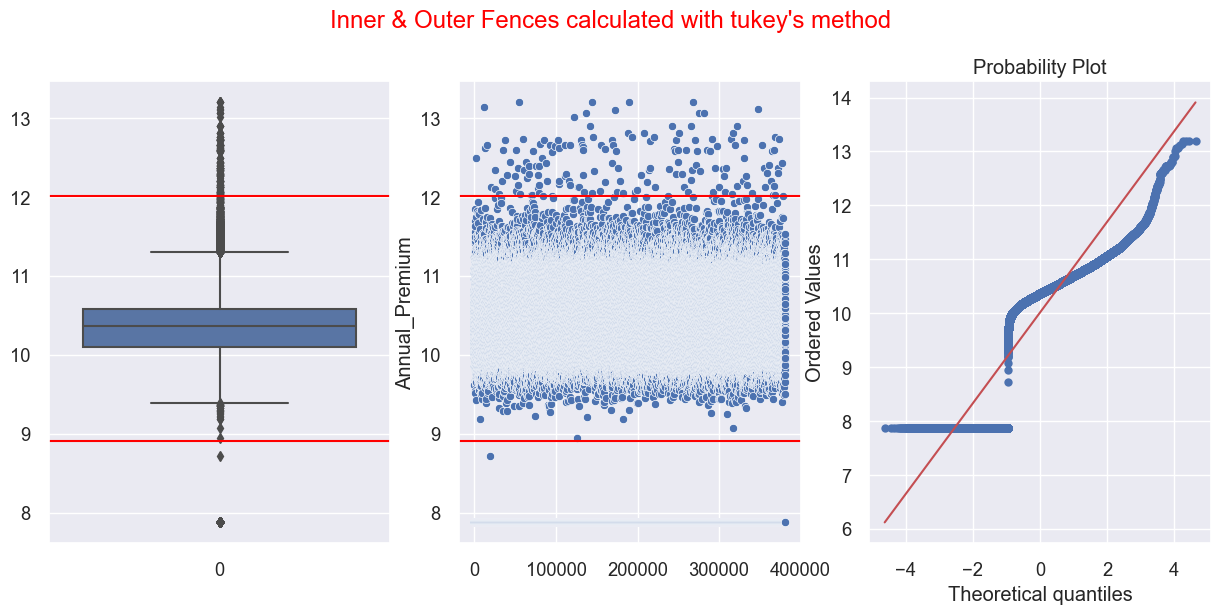

In [53]:
# Highlight points below the threshold

fig, axs = plt.subplots(1,3,figsize = (15,6))
plt.suptitle("Inner & Outer Fences calculated with tukey's method", color = 'red', y = 1)

# BOXPLOT

sns.boxplot(train['Annual_Premium'],ax = axs[0])
axs[0].axhline(y = Inner_fence,color = 'red')
axs[0].axhline(y = Outer_fence,color = 'red')

# SCATTERPLOT

sns.scatterplot(train['Annual_Premium'],ax = axs[1])
axs[1].axhline(y = Inner_fence,color = 'red')
axs[1].axhline(y = Outer_fence,color = 'red')

# Q-Q plot

stats.probplot(train['Annual_Premium'], dist="norm",fit = True, plot=axs[2])

# Show the plot
plt.show()

In [54]:
# CLEAN THE FEATURE FROM OUTLIERS
train['Annual_Premium'] = train[(train['Annual_Premium'] > Inner_fence) & (train['Annual_Premium'] < Outer_fence)]['Annual_Premium']
# remove any NaN value in the dataset generated by cleaning
train.dropna(inplace=True)

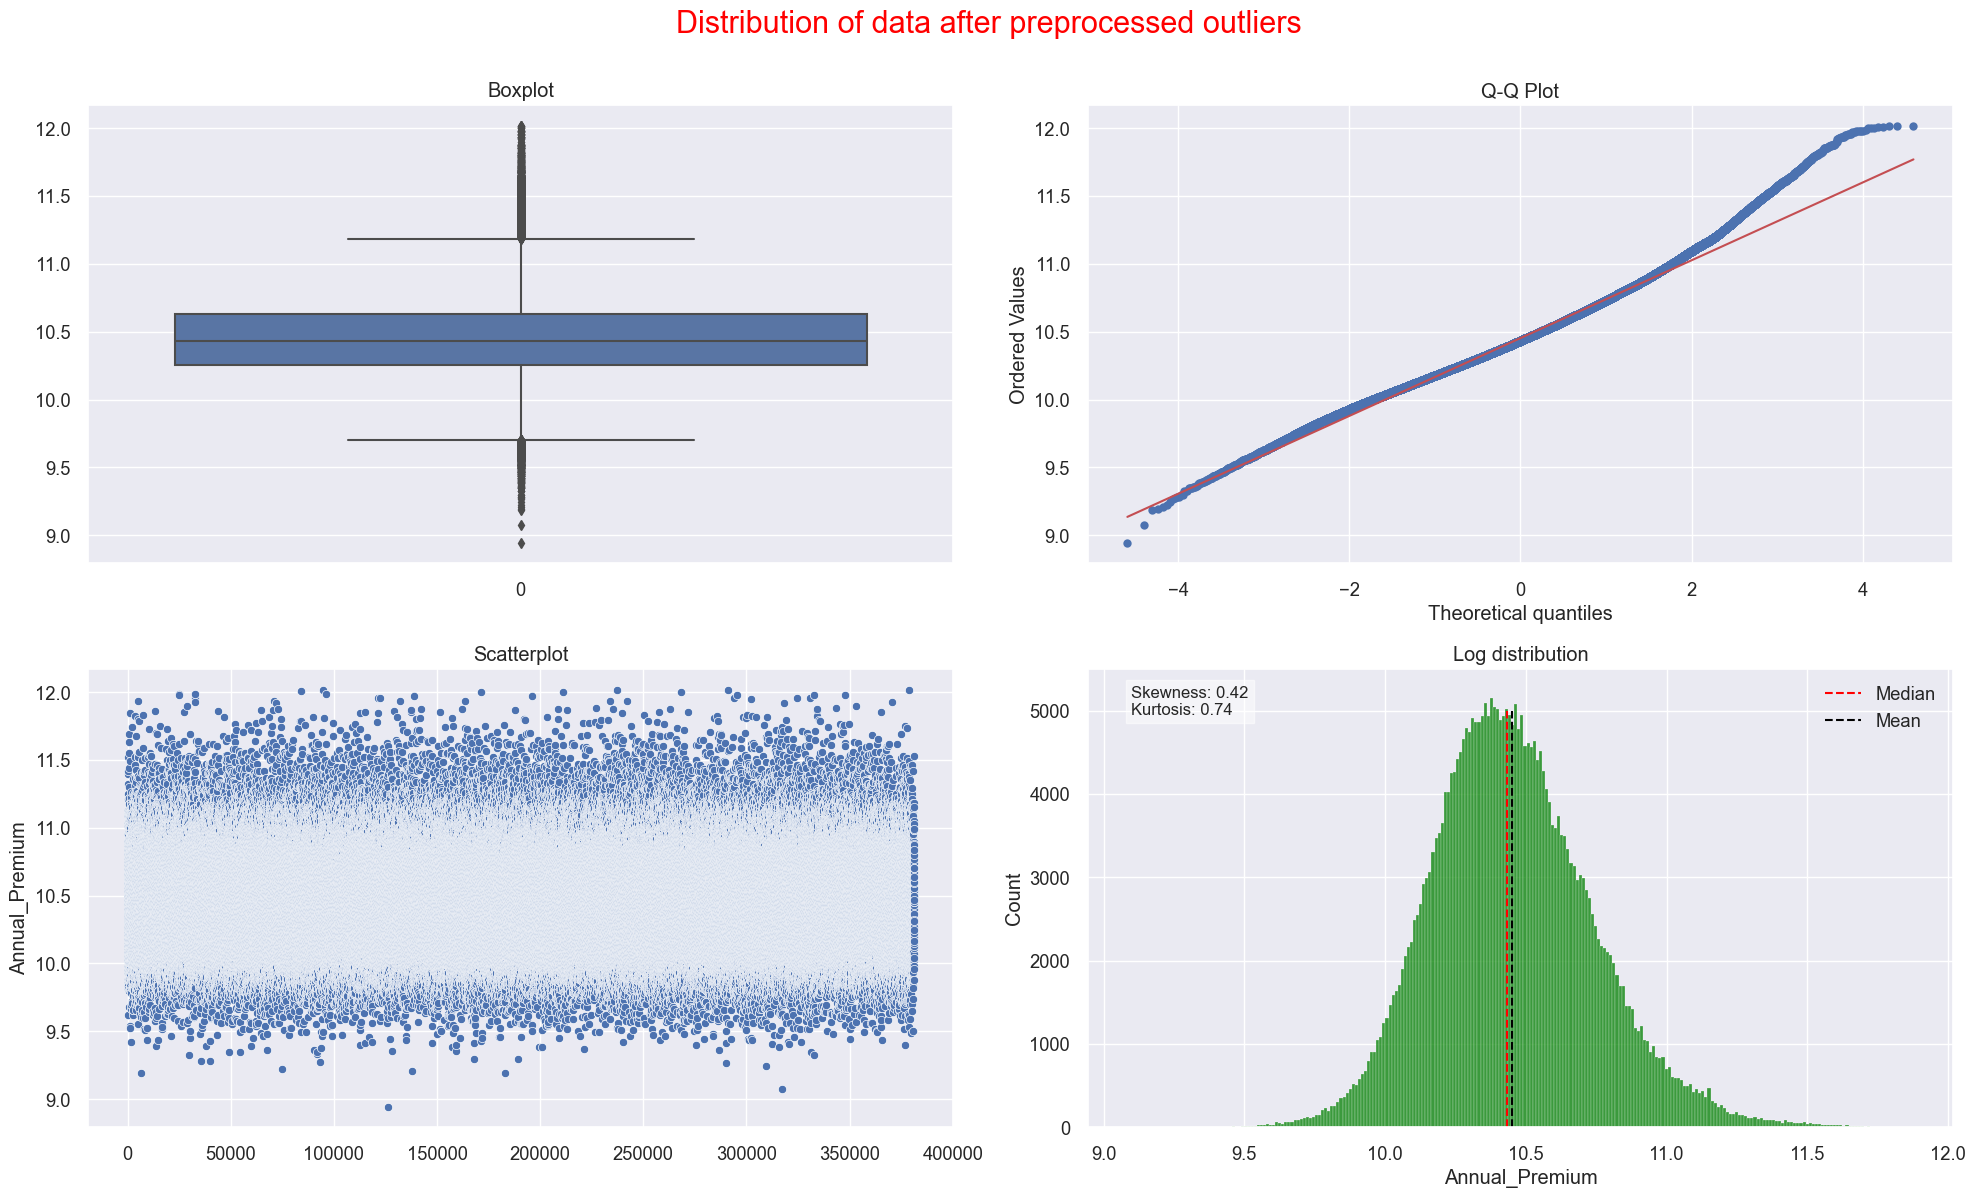

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

plt.suptitle('Distribution of data after preprocessed outliers', color = 'red', y = 1, size = 22)

# Boxplot
sns.boxplot(data=train['Annual_Premium'], ax=axs[0, 0])
axs[0, 0].set_title("Boxplot")

stats.probplot(train['Annual_Premium'], dist="norm",fit = True, plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot')

# Scatterplot (assuming X_filtered is a Series)
sns.scatterplot(data = train['Annual_Premium'], ax=axs[1, 0])
axs[1, 0].set_title("Scatterplot")

# Histogram with additional information
sns.histplot(data = train['Annual_Premium'], color='green', ax=axs[1, 1])
axs[1, 1].set_title('Log distribution')

# Calculate skewness and kurtosis
skewness = round(stats.skew(train['Annual_Premium']), 2)
kurtosis = round(stats.kurtosis(train['Annual_Premium']), 2)

# Add skewness and kurtosis information to the plot
axs[1, 1].text(0.05, 0.9, f"Skewness: {skewness}\nKurtosis: {kurtosis}",
               transform=axs[1, 1].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add vertical lines for median and mean
axs[1, 1].axvline(x=train['Annual_Premium'].median(),ymax = 5000/5500, color='red', linestyle='--', label='Median')
axs[1, 1].axvline(x=train['Annual_Premium'].mean(),ymax = 5000/5500, color='black', linestyle='--', label='Mean')

# Set x-axis/y_axis limits
axs[1, 1].set_xlim(train['Annual_Premium'].min(), train['Annual_Premium'].max())
axs[1, 1].set_ylim(0,5500)

# Adjust the legend
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [56]:
# One variable to treat is remain, and it is AGE
# I want divide into bins the age to better handle the variable with one hot encoding.
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Define your age bin boundaries
age_labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']  # Labels for the bins

# Step 1: Create Age Groups (Binning)
train['Age'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, right=False)

# Outlier Analysis and Handling Report

In this report, I describe the process of conducting a visual analysis of outliers and implementing Tukey's interquartile range method to identify and handle outliers in the dataset.

## 1. Visual Analysis of Outliers

To gain a better understanding of the distribution and impact of outliers, I conducted a comprehensive visual analysis. This analysis involved the use of various plots and graphs, including:

- #### Boxplots


- #### Scatterplots


- #### Q-Q Plot (Quantile-Quantile Plot)


## 2. Outlier Identification with Tukey's Interquartile Range (IQR) Method

To systematically identify and select outliers for elimination, I employed Tukey's IQR method. The key steps in this process include:

- **Calculating the IQR (Interquartile Range):** The IQR is the range between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.

- **Defining the Thresholds:** Using a constant multiplier (commonly denoted as "k"), I determined the upper and lower bounds for outliers. The multiplier "k" is a parameter that can be adjusted based on the specific characteristics of the data. The original method suggests a value of 1.5 for "k," but it can be customized to meet specific needs.

## 3. Visual Analysis After Outlier Elimination

After eliminating the identified outliers, I conducted a follow-up visual analysis to assess the impact of the removal on the distribution and characteristics of the data. This step is crucial for understanding how outlier removal affects the overall shape of the dataset.

## Conclusion

In this analysis, the goal was not to indiscriminately remove all outliers but to strike a balance between minimizing their influence on future models and preserving as much valuable information as possible. The choice of the constant multiplier "k" in Tukey's IQR method was considered carefully, and the process was conducted with the objective of achieving data integrity and robustness in subsequent analyses.

The steps outlined in this report provide a structured approach to outlier analysis and handling, ensuring that outliers are addressed in a data-driven and thoughtful manner.

For further analysis, it is recommended to explore the impact of different "k" values on outlier detection and assess how outlier removal affects the performance of future models.


~~~

> # BUILD THE PIPELINE AND TRAIN THE MODEL'S

In [57]:
# Dataset for train the model
X = train.drop('Response',axis = 1)
y = train['Response']

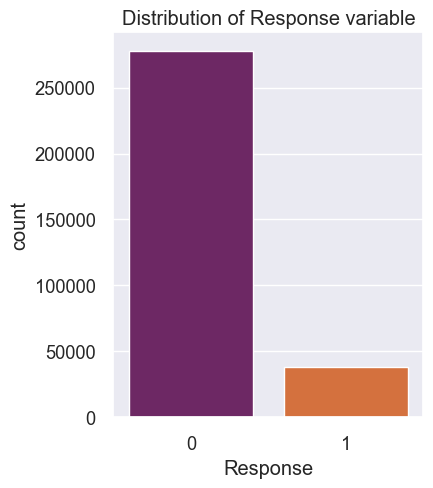

In [58]:
# Let's check the distribution of the classes for y
plt.figure(figsize = (4,5))
sns.countplot(x = y, palette = 'inferno')
plt.title('Distribution of Response variable')
plt.show()

# Class Imbalance in Y Variable

## Findings

- **Class Imbalance:** The Y variable exhibits a substantial class imbalance, with one class being significantly more prevalent than the other. This imbalance can skew model predictions and negatively impact overall model performance.

## Recommended Actions

1. **Oversampling the Weak Class:**
   To balance the class distribution, we can oversampling the minority class (the weak class).

2. **Undersampling the Strong Class:**
   Simultaneously, we can undersampling the majority class (the strong class) to match the reduced number of instances in the minority class.

## Conclusion
Addressing the class imbalance in the Y variable is a critical step in enhancing the predictive power of our models. While both oversampling and undersampling are viable strategies, i recommend **oversampling** the weak class. Oversampling allows us to balance the class distribution without losing information present in the majority class. This approach will contribute to more accurate and reliable predictions, ultimately improving the quality of our analysis and decision-making processes.


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=8986)

In [60]:
# Define your categorical and numerical features
categorical = ['Gender', 'Age', 'Vehicle_Age', 'Vehicle_Damage']
numerical = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Numerical transformer
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Categorical transformer
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', ce.BinaryEncoder(cols=categorical))
])

# Combine numerical and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ],
    remainder='passthrough'
).set_output(transform='pandas')


# Create an oversampling transformer
oversample_transformer = RandomOverSampler(random_state = 8986)

In [61]:
X_train_resample,y_train_resample = oversample_transformer.fit_resample(X_train, y_train)

In [62]:
def final_pipeline(model):
    
    final_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    return final_pipeline

In [63]:
# Model A: XGBoost Classifier
xgb = XGBClassifier()
param_grid_xgb = {
    'classifier__n_estimators': stats.randint(2,14),
    'classifier__max_depth': stats.randint(2,6),
    'classifier__learning_rate': stats.uniform(loc = .01,scale = 1.0),
    # Add other hyperparameters here
}

# Model B: Balanced Random Forest Classifier
bfc = BalancedRandomForestClassifier(sampling_strategy = 'all',replacement = True,random_state=8986)
param_grid_bfc = {
    'classifier__n_estimators': stats.randint(2,20),
    'classifier__max_depth': stats.randint(1,6),
    # Add other hyperparameters here
}

# Model C: Logistic Regression
logreg = LogisticRegression()
param_grid_logreg = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': stats.uniform(loc = .01, scale = 1.0),
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 300]
    # Add other hyperparameters here
}

In [64]:
logreg_pipeline = final_pipeline(logreg)
xgb_pipeline = final_pipeline(xgb)
bfc_pipeline = final_pipeline(bfc)

In [65]:
score = make_scorer(f1_score)

In [66]:
def run_randomized_search(pipeline,param_grid, X, y):
    
    
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=5,  # Adjust as needed
        cv=2,       # Number of cross-validation folds
        scoring=score,  # Use the appropriate scoring metric
        random_state=42
    )
    
    random_search.fit(X, y)
    
    
    results = {
        
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'cv_results': random_search.cv_results_,
        'best_model': random_search.best_estimator_
        }
    
    return results


In [67]:
logreg_result = run_randomized_search(logreg_pipeline,param_grid_logreg,
                                      X_train_resample,y_train_resample)

bfc_result = run_randomized_search(bfc_pipeline,param_grid_bfc,
                                   X_train_resample,y_train_resample)

xgb_result = run_randomized_search(xgb_pipeline,param_grid_xgb,
                                   X_train_resample,y_train_resample)

/Users/Thomas/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Thomas/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Thomas/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/Thomas/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1162, in 

# Machine Learning Model Building Report

**Objective**: Develop and evaluate machine learning models for a classification task.

## Executive Summary

In this report, we outline the key steps taken to build machine learning models for a classification problem. Our objective is to achieve the best possible performance while addressing class imbalance.

## Key Steps

### 1. Data Preparation

- **Data Collection**: We obtained a dataset containing both input features and the target variable.

- **Data Splitting**: The data was divided into two sets: a training set used for model training and a testing set used for evaluation.

### 2. Preprocessing

- **Feature Transformation**: We applied various data preprocessing techniques, including scaling, encoding, and handling missing values, to prepare the data for modeling.

### 3. Addressing Class Imbalance

- **Oversampling**: To address class imbalance, we oversampled the minority class using Random oversampling technique. This enhances the model's ability to learn from the minority class.

### 4. Model Selection

- **Classifier Parameters**: We defined different sets of hyperparameters for various classifiers, controlling their behavior during training.

### 5. Model Training

- **Model Training**: The models were trained on the resampled data to learn patterns and associations within the features.

## Conclusion

In conclusion, our approach involves thorough data preparation, class imbalance mitigation, and rigorous model training.

The choice of the final model will be based on a comprehensive analysis of performance metrics, ensuring that it aligns with specific business requirements.

In [68]:
# All function usefull to plot metrics

def conf_matrix(y_true,y_pred):
    
    """
    Generate and display a confusion matrix for evaluating classification model performance.

    Parameters:
        y_true (array-like): True target labels.
        y_pred (array-like): Predicted target labels.

    Displays:
        A heatmap representation of the confusion matrix.
    """
    
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d",
                cmap="Blues",
                cbar=False)
    
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    
def class_report(y_true,y_pred):
    
    """
    Generate and print a classification report for a set of true labels and predicted labels.

    Parameters:
        y_true (array-like): True target labels.
        y_pred (array-like): Predicted target labels.

    Prints:
        Classification report containing precision, recall, F1-score, and support for each class.
    """
    
    return print(classification_report(y_true,y_pred))


def roc_auc_curve(model,x_train,y_train,x_test,y_test):
    
    """
    Generate and display the Receiver Operating Characteristic (ROC) curve and
    Area Under the Curve (AUC) for a binary classification model.

    Parameters:
        model (estimator): The binary classification model to evaluate.
        x_train (array-like): Training set input features.
        y_train (array-like): Training set target labels (binary).
        x_test (array-like): Test set input features.
        y_test (array-like): Test set target labels (binary).

    Displays:
        ROC curve and AUC plot for the given model.
    """
    
    visualizer = ROCAUC(model, classes=["Not Subscriber", "Subscriber"])

    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    plt.show()
    
def plot_feature_importance(features, importance):
    # Create a DataFrame to store feature names and importance scores
    feature_df = pd.DataFrame({'Features': features, 'Importance': importance})
    
    # Sort the DataFrame by importance in descending order
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    
    # Create a Seaborn bar plot for feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Features', data=feature_df, palette='viridis')
    
    # Customize the plot
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    
    # Show the plot
    plt.show()    
 

In [69]:
preprocessor = logreg_pipeline.named_steps['preprocessor']
# Transform your data (e.g., X_train_resample) to get the transformed features
transformed_data = preprocessor.fit_transform(X_train_resample)
# Get the names of the transformed features from the preprocessor
column_names = preprocessor.get_feature_names_out()  # Replace 'cat' with 'num' if it's numeric

<span style="font-size: 52px; background-color: #FFD700; color: black; padding: 4px;">Logistic Regression metrics:</span>

In [70]:
best_params_logreg = logreg_result['best_params']
best_logreg = logreg_result['best_model']

# Print the best parameters
print("Best Parameters:", best_params_logreg)

Best Parameters: {'classifier__C': 0.9799098521619943, 'classifier__max_iter': 200, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [71]:
y_pred_proba_logreg = best_logreg.predict_proba(X_test)
y_pred_test_logreg = best_logreg.predict(X_test)

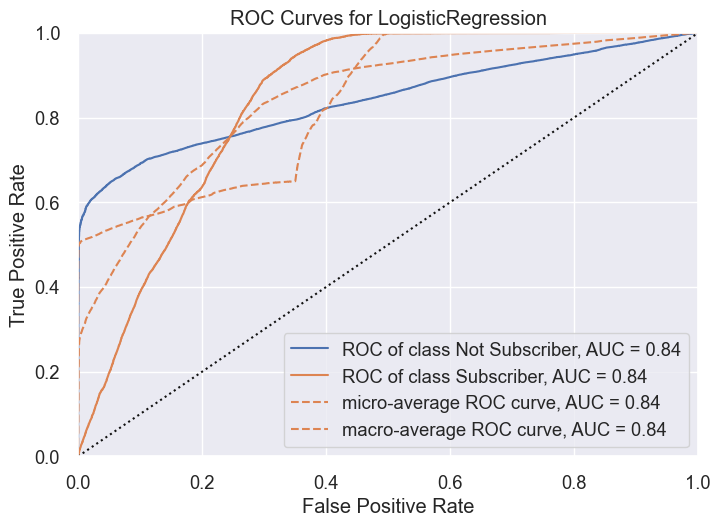

In [72]:
roc_auc_curve(best_logreg,X_train,y_train,X_test,y_test)

In [73]:
class_report(y_test,y_pred_test_logreg)

              precision    recall  f1-score   support

           0       1.00      0.61      0.75     83503
           1       0.25      0.98      0.40     11320

    accuracy                           0.65     94823
   macro avg       0.62      0.79      0.58     94823
weighted avg       0.91      0.65      0.71     94823



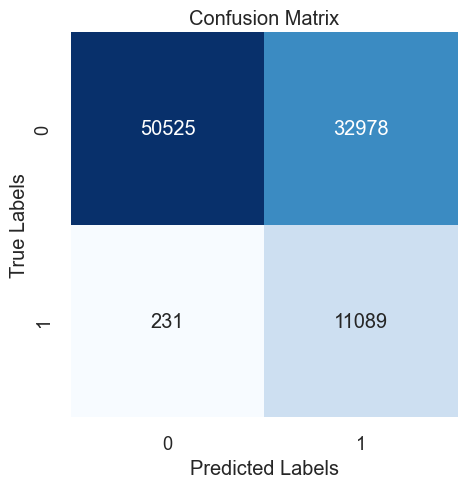

In [74]:
conf_matrix(y_test,y_pred_test_logreg)

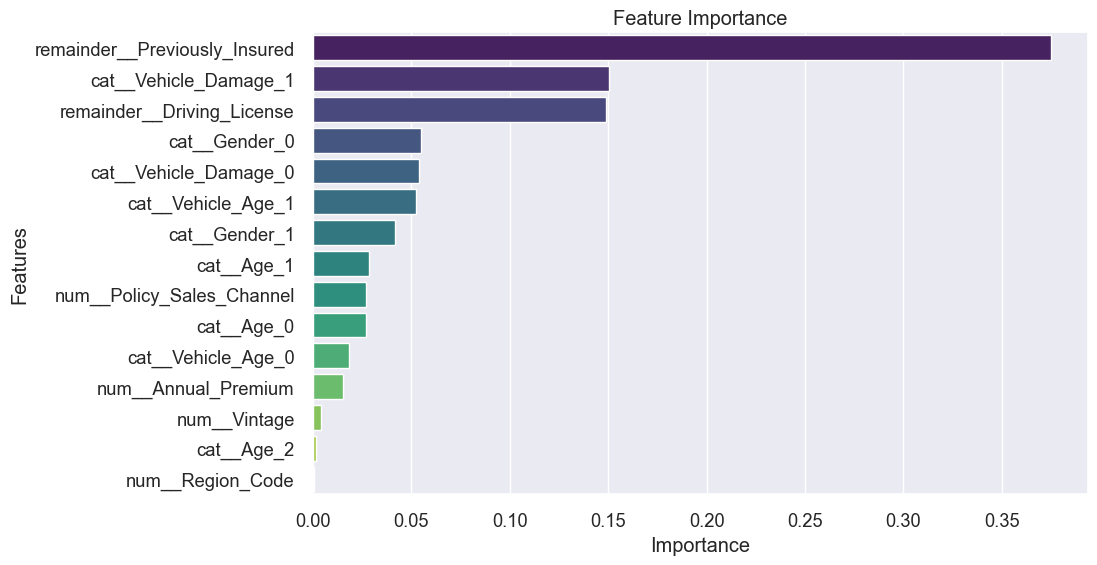

In [75]:
coefficients = best_logreg.named_steps['classifier'].coef_[0]
feature_importance_logreg = np.abs(coefficients)
feature_importance_logreg /= np.sum(feature_importance_logreg)

plot_feature_importance(column_names,feature_importance_logreg)

<span style="font-size: 52px; background-color: #FFD700; color: black; padding: 4px;">Balanced Random Forest metrics:</span>

In [76]:
best_params_bfc = bfc_result['best_params']
best_bfc = bfc_result['best_model']

# Print the best parameters
print("Best Parameters:", best_params_bfc)


Best Parameters: {'classifier__max_depth': 4, 'classifier__n_estimators': 16}


In [77]:
y_pred_proba_bfc = best_bfc.predict_proba(X_test)
y_pred_test_bfc = best_bfc.predict(X_test)

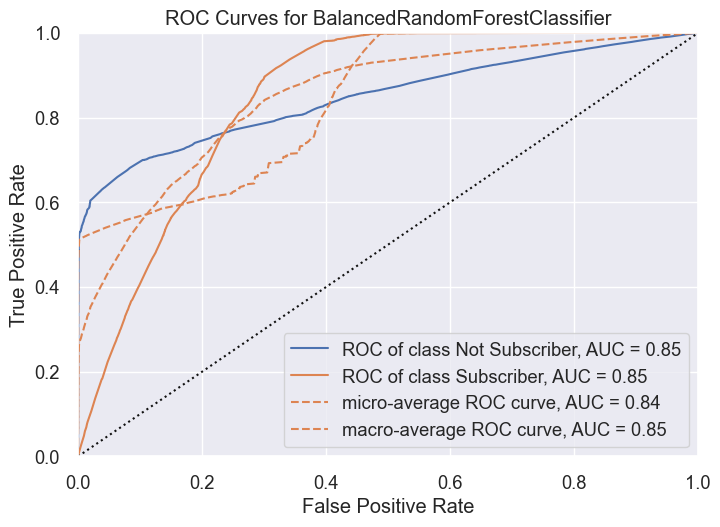

In [78]:
roc_auc_curve(best_bfc,X_train,y_train,X_test,y_test)

In [79]:
class_report(y_test,y_pred_test_bfc)

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     83503
           1       0.27      0.94      0.42     11320

    accuracy                           0.69     94823
   macro avg       0.63      0.80      0.61     94823
weighted avg       0.90      0.69      0.75     94823



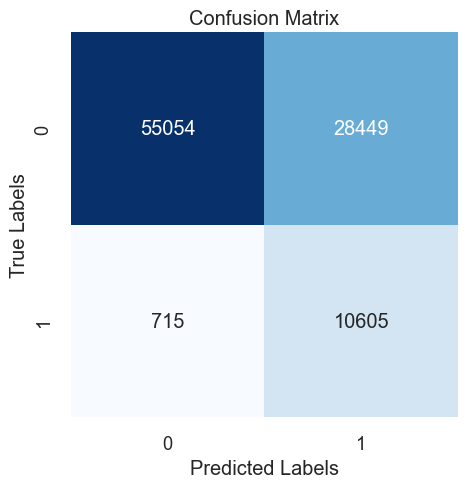

In [80]:
conf_matrix(y_test,y_pred_test_bfc)

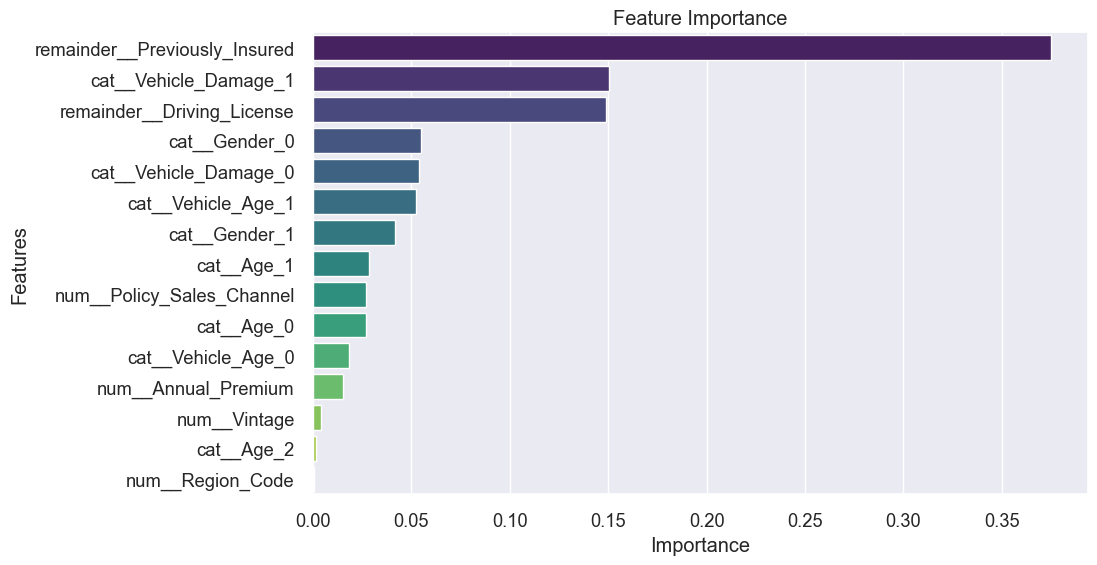

In [81]:
feature_importance_bfc = best_bfc.named_steps['classifier'].feature_importances_
feature_importance_bfc = np.abs(coefficients)
feature_importance_bfc /= np.sum(feature_importance_bfc)
plot_feature_importance(column_names,feature_importance_bfc)

<span style="font-size: 52px; background-color: #FFD700; color: black; padding: 4px;">Extreme Gradient Boosting (XGB) metrics:</span>


In [82]:
best_params_xgb = xgb_result['best_params']
best_xgb = xgb_result['best_model']

# Print the best parameters
print("Best Parameters:", best_params_xgb)


Best Parameters: {'classifier__learning_rate': 0.45583275285359115, 'classifier__max_depth': 4, 'classifier__n_estimators': 12}


In [83]:
y_pred_proba_xgb = best_xgb.predict_proba(X_test)
y_pred_test_xgb = best_xgb.predict(X_test)

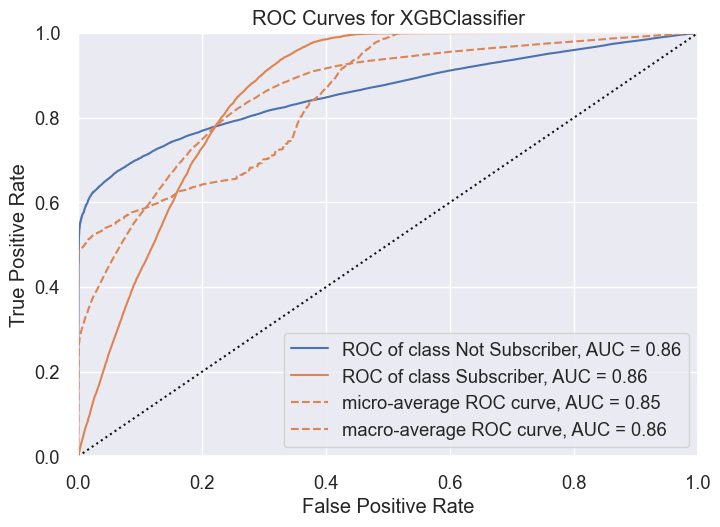

In [84]:
roc_auc_curve(best_xgb,X_train,y_train,X_test,y_test)

In [85]:
class_report(y_test,y_pred_test_xgb)

              precision    recall  f1-score   support

           0       0.99      0.67      0.80     83503
           1       0.28      0.94      0.43     11320

    accuracy                           0.70     94823
   macro avg       0.63      0.80      0.61     94823
weighted avg       0.90      0.70      0.75     94823



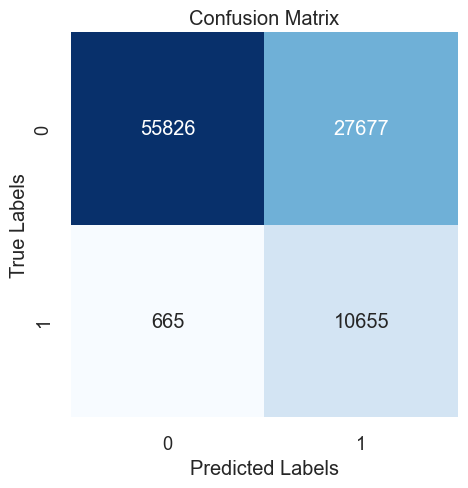

In [86]:
conf_matrix(y_test,y_pred_test_xgb)

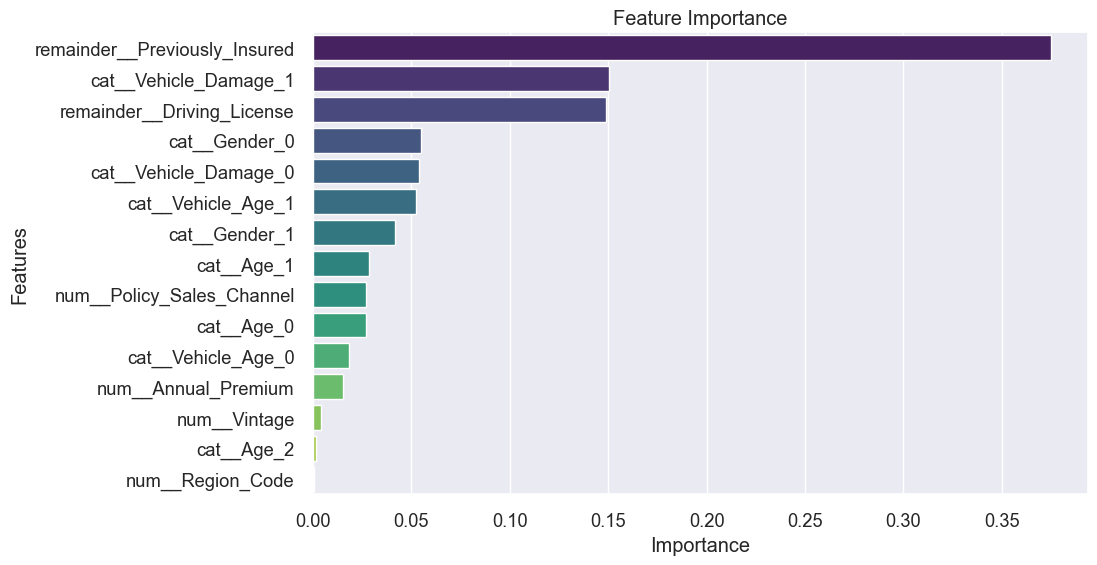

In [87]:
feature_importance_xgb = best_xgb.named_steps['classifier'].feature_importances_
feature_importance_xgb = np.abs(coefficients)
feature_importance_xgb /= np.sum(feature_importance_xgb)

plot_feature_importance(column_names,feature_importance_xgb)

# Model Evaluation Report

In this report, we evaluate the performance of three different machine learning models on a binary classification task. The goal is to detect the positive class in a strongly imbalanced dataset. The models we trained and evaluated are:

1. **Logistic Regression**
2. **Balanced Random Forest Classifier**
3. **Extreme Gradient Boosting (XGBoost)**


It's evident from the cross-validation means that all three models have relatively low precision on the positive class, indicating a high rate of false positives. This is expected in strongly imbalanced datasets. However, they all have relatively high recall, which means they are effective at capturing true positive instances, although it's important to note that there may still be a significant number of undetected positive instances (false negatives) due to the class imbalance.

~~~

<!-- Title with White Text and Light Blue Background -->
<h1 style="color: black; background-color: cyan; padding: 10px;">Running XGBoost on the entire Dataset</h1>


In [88]:
XGBoost = xgb_result['best_model']

In [89]:
deployment_pipeline = Pipeline([
    ('classifier',XGBoost)
    ])

In [90]:
deployment_pipeline.fit(X,y)

Pipeline(steps=[('classifier',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['Region_Code',
                                                                    'Annual_Premium',
                                                                    'Policy_Sales_Channel',
                                                                    'Vintage']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_freque...
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=0.45583275285359115,
                                                max_bin=None,
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=4, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=12, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...))]))])

In [91]:
y_predict_X = deployment_pipeline.predict(X)
y_predict_proba_X = deployment_pipeline.predict_proba(X)

In [92]:
y_probabilities = deployment_pipeline.predict_proba(X)[:, 1]
custom_threshold = 0.2  # You can adjust this threshold value as needed

# Create predictions based on the custom threshold
y_custom_predictions = (y_probabilities >= custom_threshold).astype(int)

# Evaluate the model with the adjusted threshold
print(classification_report(y, y_custom_predictions))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85    277897
           1       0.31      0.82      0.45     38177

    accuracy                           0.76    316074
   macro avg       0.64      0.79      0.65    316074
weighted avg       0.89      0.76      0.80    316074



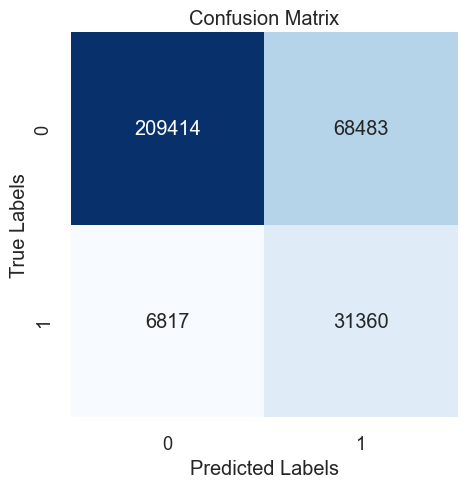

In [93]:
conf_matrix(y,y_custom_predictions)

In [94]:
# Create a DataFrame to store predictions and probabilities
final_result = pd.DataFrame()
final_result["Predictions"] = y_custom_predictions
final_result["Probabilità"] = y_probabilities.round(4)

# Calculate and print counts
counts = final_result["Predictions"].value_counts()
print(f"Not Subscriber = {counts[0]} ({counts[0] / counts.sum() * 100:.2f}%)")
print(f"Subscriber = {counts[1]} ({counts[1] / counts.sum() * 100:.2f}%)")

Not Subscriber = 216231 (68.41%)
Subscriber = 99843 (31.59%)


In [95]:
# Serialize the pipeline to a file
joblib.dump(deployment_pipeline, 'trained_pipeline.pkl')

['trained_pipeline.pkl']

In [96]:
# Load the serialized pipeline
loaded_pipeline = joblib.load('trained_pipeline.pkl')

In [97]:
new_predictions = loaded_pipeline.predict(test)
new_probability_predictions = loaded_pipeline.predict_proba(test)

In [98]:
y_test_probabilities = deployment_pipeline.predict_proba(test)[:, 1]
custom_test_threshold = 0.2  # You can adjust this threshold value as needed

# Create predictions based on the custom threshold
y_custom_predictions_test = (y_test_probabilities >= custom_test_threshold).astype(int)

In [101]:
# Create a DataFrame to store predictions and probabilities
final_test_result = pd.DataFrame()
final_test_result["Predictions"] = y_custom_predictions_test
final_test_result["Probabilità"] = y_test_probabilities.round(4)

# Calculate and print counts
counts = final_test_result["Predictions"].value_counts()
print(f"Not Subscriber = {counts[0]} ({counts[0] / counts.sum() * 100:.2f}%)")
print(f"Subscriber = {counts[1]} ({counts[1] / counts.sum() * 100:.2f}%)")

Not Subscriber = 76177 (59.96%)
Subscriber = 50860 (40.04%)


# Machine Learning Workflow Overview

This document provides an overview of the standard machine learning workflow, highlighting key steps and their significance.

## Model Training and Evaluation

1. **Model Training**
   
   - Train a machine learning model on the entire dataset

2. **Model Evaluation**
   
   - Assess the model's performance using evaluation metrics like precision, recall, and F1-score.

   - Visualize performance using a confusion matrix, which shows true positives, false positives, true negatives, and false negatives.

## Customizing Predictions

3. **Custom Threshold**

   - Set a custom threshold to control how the model classifies instances (e.g., categorizing customers as subscribers).

   - Adjust the threshold as needed to achieve the desired trade-off between precision and recall.

## Storing and Reporting Predictions

4. **Storing Predictions**

   - Store model predictions and associated probabilities in a structured format (e.g., a DataFrame).

5. **Counting and Reporting**

   - Compute counts and percentages for each class to gain insights into the model's predictions.

## Deployment Preparation

6. **Deployment Pipeline**

   - Create a deployment pipeline that packages the trained model for easy deployment.
